# **Project ID : PTID-CDS-OCT-23-1669**

# Problem Statement

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain.

Use relevant machine model to predict the Flight Fare.

### Importing libraries

In [17]:
import numpy as np

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Domain Analysis

**Airline:** The name of the airline.

**Date_of_Journey:** The date of the journey

**Source:** The source from which the service begins.

**Destination:** The destination where the service ends.

**Route:** The route taken by the flight to reach the destination.

**Dep_Time:** The time when the journey starts from the source.

**Arrival_Time:** Time of arrival at the destination.

**Duration:** Total duration of the flight.

**Total_Stops:** Total stops between the source and destination.

**Additional_Info:** Additional information about the flight

**Price:** The price of the ticket 

In [19]:
#importing dataset
data = pd.read_excel('Flight_Fare.xlsx')
data

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10683 rows x 11 columns]


 ## Basic Checks

In [20]:
#columns
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [21]:
#checking total records
print('Total number of rows :',data.shape[0])
print('Total number of rows :',data.shape[1])

Total number of rows : 10683
Total number of rows : 11


In [22]:
#checking datatypes
data.dtypes
#all are objects except target variable

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [23]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [24]:
#missing values
data.isnull().sum()
#There are missing values in 'Route' and 'Total_Stops'

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### Insights

* In 'Destination' feature, there are 2 values for 'Delhi'.
* Same as in 'Additional' info, there are two values for 'No Info'.

### Converting date and time columns from object to date and time

In [25]:
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])
data['Arrival_Time']=pd.to_datetime(data['Arrival_Time'])
data['Dep_Time']=pd.to_datetime(data['Dep_Time'])

In [26]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [27]:
data

Airline Date_of_Journey    Source Destination  \
0           IndiGo      2019-03-24  Banglore   New Delhi   
1        Air India      2019-05-01   Kolkata    Banglore   
2      Jet Airways      2019-06-09     Delhi      Cochin   
3           IndiGo      2019-05-12   Kolkata    Banglore   
4           IndiGo      2019-03-01  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia      2019-04-09   Kolkata    Banglore   
10679    Air India      2019-04-27   Kolkata    Banglore   
10680  Jet Airways      2019-04-27  Banglore       Delhi   
10681      Vistara      2019-03-01  Banglore   New Delhi   
10682    Air India      2019-05-09     Delhi      Cochin   

                       Route            Dep_Time        Arrival_Time Duration  \
0                  BLR → DEL 2024-10-23 22:20:00 2024-03-22 01:10:00   2h 50m   
1      CCU → IXR → BBI → BLR 2024-10-23 05:50:00 2024-10-23 13:15:00   7h 25m   
2      DEL → LKO → BOM → COK 2024-10-23 09:25:00 2024-06-10 04:25:00      19h   
3            CCU → NAG → BLR 2024-10-23 18:05:00 2024-10-23 23:30:00   5h 25m   
4            BLR → NAG → DEL 2024-10-23 16:50:00 2024-10-23 21:35:00   4h 45m   
...                      ...                 ...                 ...      ...   
10678              CCU → BLR 2024-10-23 19:55:00 2024-10-23 22:25:00   2h 30m   
10679              CCU → BLR 2024-10-23 20:45:00 2024-10-23 23:20:00   2h 35m   
10680              BLR → DEL 2024-10-23 08:20:00 2024-10-23 11:20:00       3h   
10681              BLR → DEL 2024-10-23 11:30:00 2024-10-23 14:10:00   2h 40m   
10682  DEL → GOI → BOM → COK 2024-10-23 10:55:00 2024-10-23 19:15:00   8h 20m   

      Total_Stops Additional_Info  Price  
0        non-stop         No info   3897  
1         2 stops         No info   7662  
2         2 stops         No info  13882  
3          1 stop         No info   6218  
4          1 stop         No info  13302  
...           ...             ...    ...  
10678    non-stop         No info   4107  
10679    non-stop         No info   4145  
10680    non-stop         No info   7229  
10681    non-stop         No info  12648  
10682     2 stops         No info  11753  

[10683 rows x 11 columns]

In [28]:
#Extracting necessary values from 'Date_of_Journey','Dep_Time' and 'Arrival_Time'

data['Journey_day']=pd.to_datetime(data.Date_of_Journey,format='%d%m%Y').dt.day
data['Journey_month']=pd.to_datetime(data.Date_of_Journey,format='%d%m%Y').dt.month

data['Dep_hour']=pd.to_datetime(data.Dep_Time).dt.hour
data['Dep_min']=pd.to_datetime(data.Dep_Time).dt.minute

data['Arrival_hour']=pd.to_datetime(data.Arrival_Time).dt.hour
data['Arrival_min']=pd.to_datetime(data.Arrival_Time).dt.minute

#dropping all 3 main columns

data.drop(['Date_of_Journey','Arrival_Time','Dep_Time'],inplace=True,axis=1)

In [29]:
#converting duration into total minutes
data.Duration=data.Duration.str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [30]:
data

Airline    Source Destination                  Route  Duration  \
0           IndiGo  Banglore   New Delhi              BLR → DEL       170   
1        Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR       445   
2      Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      1140   
3           IndiGo   Kolkata    Banglore        CCU → NAG → BLR       325   
4           IndiGo  Banglore   New Delhi        BLR → NAG → DEL       285   
...            ...       ...         ...                    ...       ...   
10678     Air Asia   Kolkata    Banglore              CCU → BLR       150   
10679    Air India   Kolkata    Banglore              CCU → BLR       155   
10680  Jet Airways  Banglore       Delhi              BLR → DEL       180   
10681      Vistara  Banglore   New Delhi              BLR → DEL       160   
10682    Air India     Delhi      Cochin  DEL → GOI → BOM → COK       500   

      Total_Stops Additional_Info  Price  Journey_day  Journey_month  \
0        non-stop         No info   3897           24              3   
1         2 stops         No info   7662            1              5   
2         2 stops         No info  13882            9              6   
3          1 stop         No info   6218           12              5   
4          1 stop         No info  13302            1              3   
...           ...             ...    ...          ...            ...   
10678    non-stop         No info   4107            9              4   
10679    non-stop         No info   4145           27              4   
10680    non-stop         No info   7229           27              4   
10681    non-stop         No info  12648            1              3   
10682     2 stops         No info  11753            9              5   

       Dep_hour  Dep_min  Arrival_hour  Arrival_min  
0            22       20             1           10  
1             5       50            13           15  
2             9       25             4           25  
3            18        5            23           30  
4            16       50            21           35  
...         ...      ...           ...          ...  
10678        19       55            22           25  
10679        20       45            23           20  
10680         8       20            11           20  
10681        11       30            14           10  
10682        10       55            19           15  

[10683 rows x 14 columns]

In [31]:
#creating separate list for numerical and categorical columns
numerical=[]
categorical=[]

for i in data.columns:
    if data[i].dtype=='object':
        categorical.append(i)
    else:
        numerical.append(i)

print('Numerical features :',numerical)
print('Categorical features :',categorical)

Numerical features : ['Duration', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min']
Categorical features : ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [32]:
#Replacing 'New Delhi' as 'Delhi' in Destination column
data.Destination = data.Destination.replace('New Delhi','Delhi')

#similarly replacing 'No Info' as 'No info' in Additional_info column
data.Additional_Info = data.Additional_Info.replace('No Info','No info')

In [33]:
#checking duplicated values
data.duplicated().sum()

222

In [34]:
#droping duplicated values
data.drop_duplicates(inplace=True)

In [35]:
#records after dropping duplicated values
data.shape

(10461, 14)

In [36]:
#There are missing values in two categorical columns : Route, Total_Stops
#since its categorical, imputing the missing values with mode
data.loc[data.Route.isnull(),'Route']=data.Route.mode()[0]
data.loc[data.Total_Stops.isnull(),'Total_Stops']=data.Total_Stops.mode()[0]

In [37]:
#checking missing values after imputation
data.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_day        0
Journey_month      0
Dep_hour           0
Dep_min            0
Arrival_hour       0
Arrival_min        0
dtype: int64

In [38]:
#checking stats for numerical features
data.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

In [39]:
#checking missing values for categorical features
data.describe(include='O')

Airline Source Destination            Route Total_Stops  \
count         10461  10461       10461            10461       10461   
unique           12      5           5              128           5   
top     Jet Airways  Delhi      Cochin  DEL → BOM → COK      1 stop   
freq           3700   4346        4346             2377        5626   

       Additional_Info  
count            10461  
unique               9  
top            No info  
freq              8184

In [40]:
data.to_csv()

',Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min\r\n0,IndiGo,Banglore,Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10\r\n1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15\r\n2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25\r\n3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30\r\n4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35\r\n5,SpiceJet,Kolkata,Banglore,CCU → BLR,145,non-stop,No info,3873,24,6,9,0,11,25\r\n6,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,930,1 stop,In-flight meal not included,11087,12,3,18,55,10,25\r\n7,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,1265,1 stop,No info,22270,1,3,8,0,5,5\r\n8,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,1530,1 stop,In-flight meal not included,11087,12,3,8,55,10,25\r\n9,Multiple carriers,Delhi,Co

### Insights

* The minimum ticket price is 1759 rupees and the maximum ticket price is 79512 rupees.
* The minimum duration of the journey is 5 minutes and maximum duration is about 48 hours.
* Outliers are present in duration and price columns as we can see huge difference between 75% and max value.
* More people opted for jet airways.
* Almost 40% people were from Delhi.
* Almost 40% people travelled to Cochin.
* Std Deviations are higher which indicates spread of data.

# EDA

### Flight Distribution source wise

TypeError: countplot() got multiple values for argument 'data'

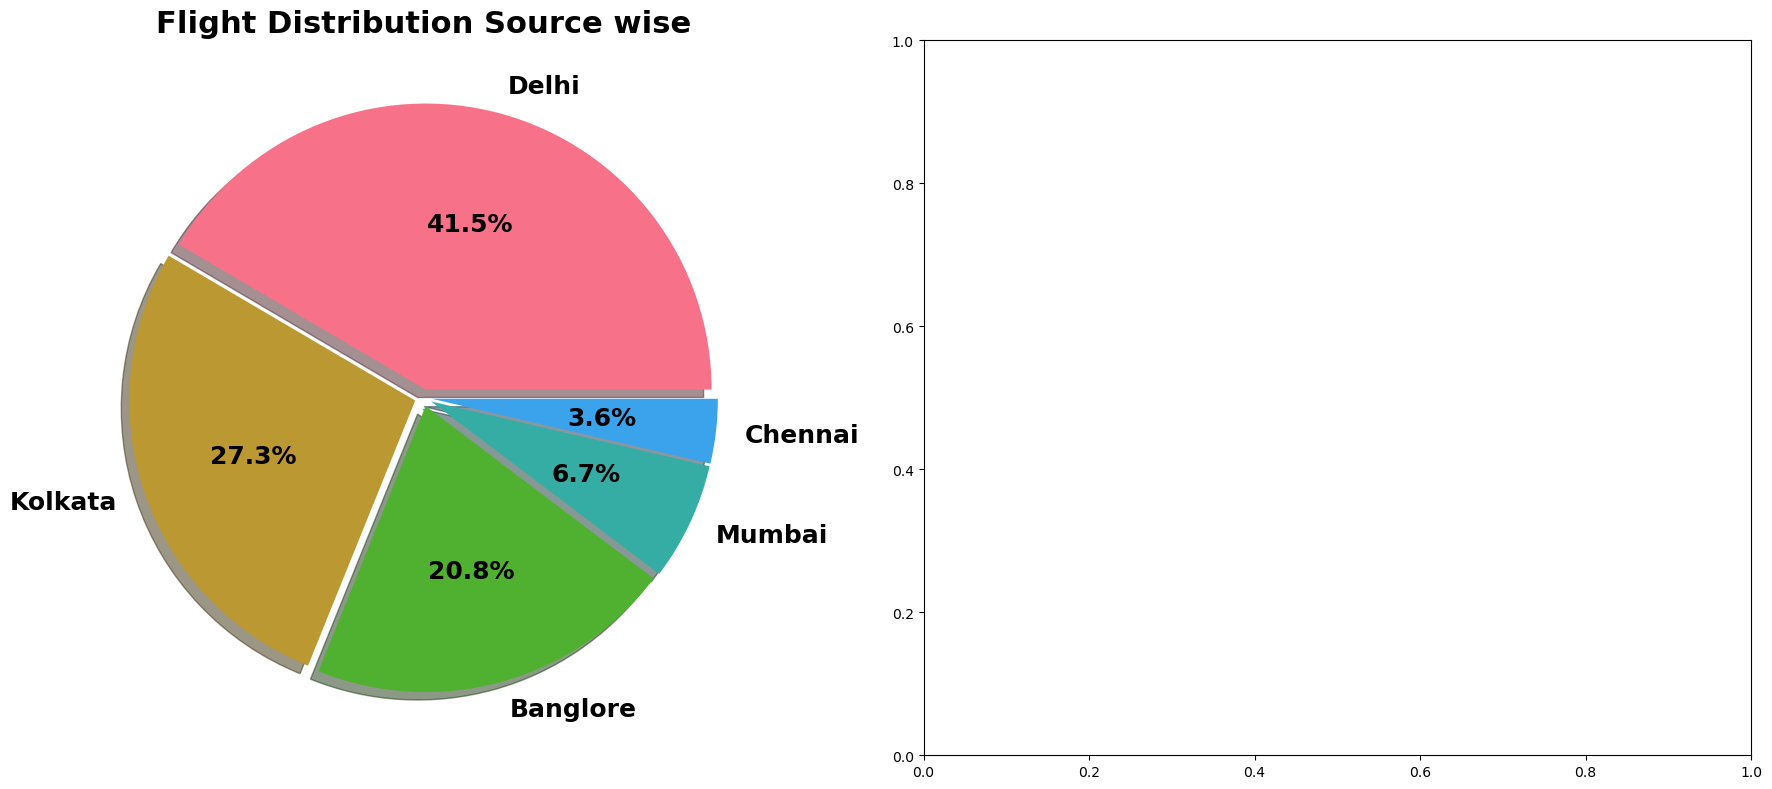

In [59]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Source'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03,0.03],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Flight Distribution Source wise', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Source',data=data,ax=ax[1])
ax[1].set_title('Source Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Source",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

#### Insights
* Most of the people were from Delhi.

### Source with respect to target variable

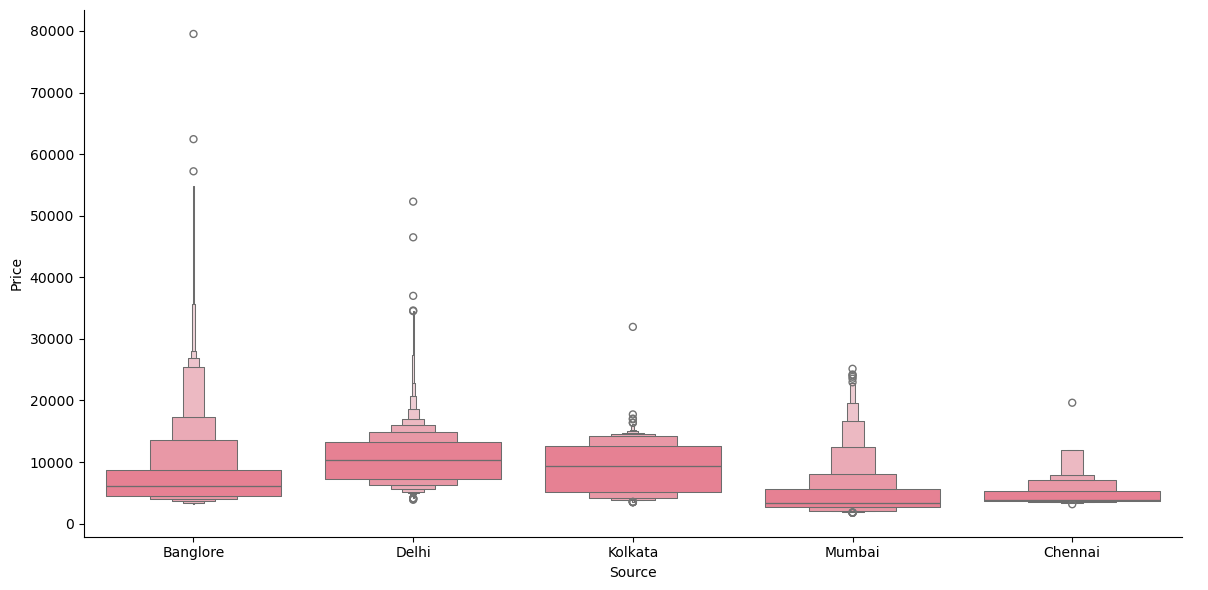

In [60]:
sns.catplot(x='Source',y='Price',data=data.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=2)
plt.show()

#### Insights
* Maximum fare comes for Bangalore flight.

### Flight distribution as per Airline

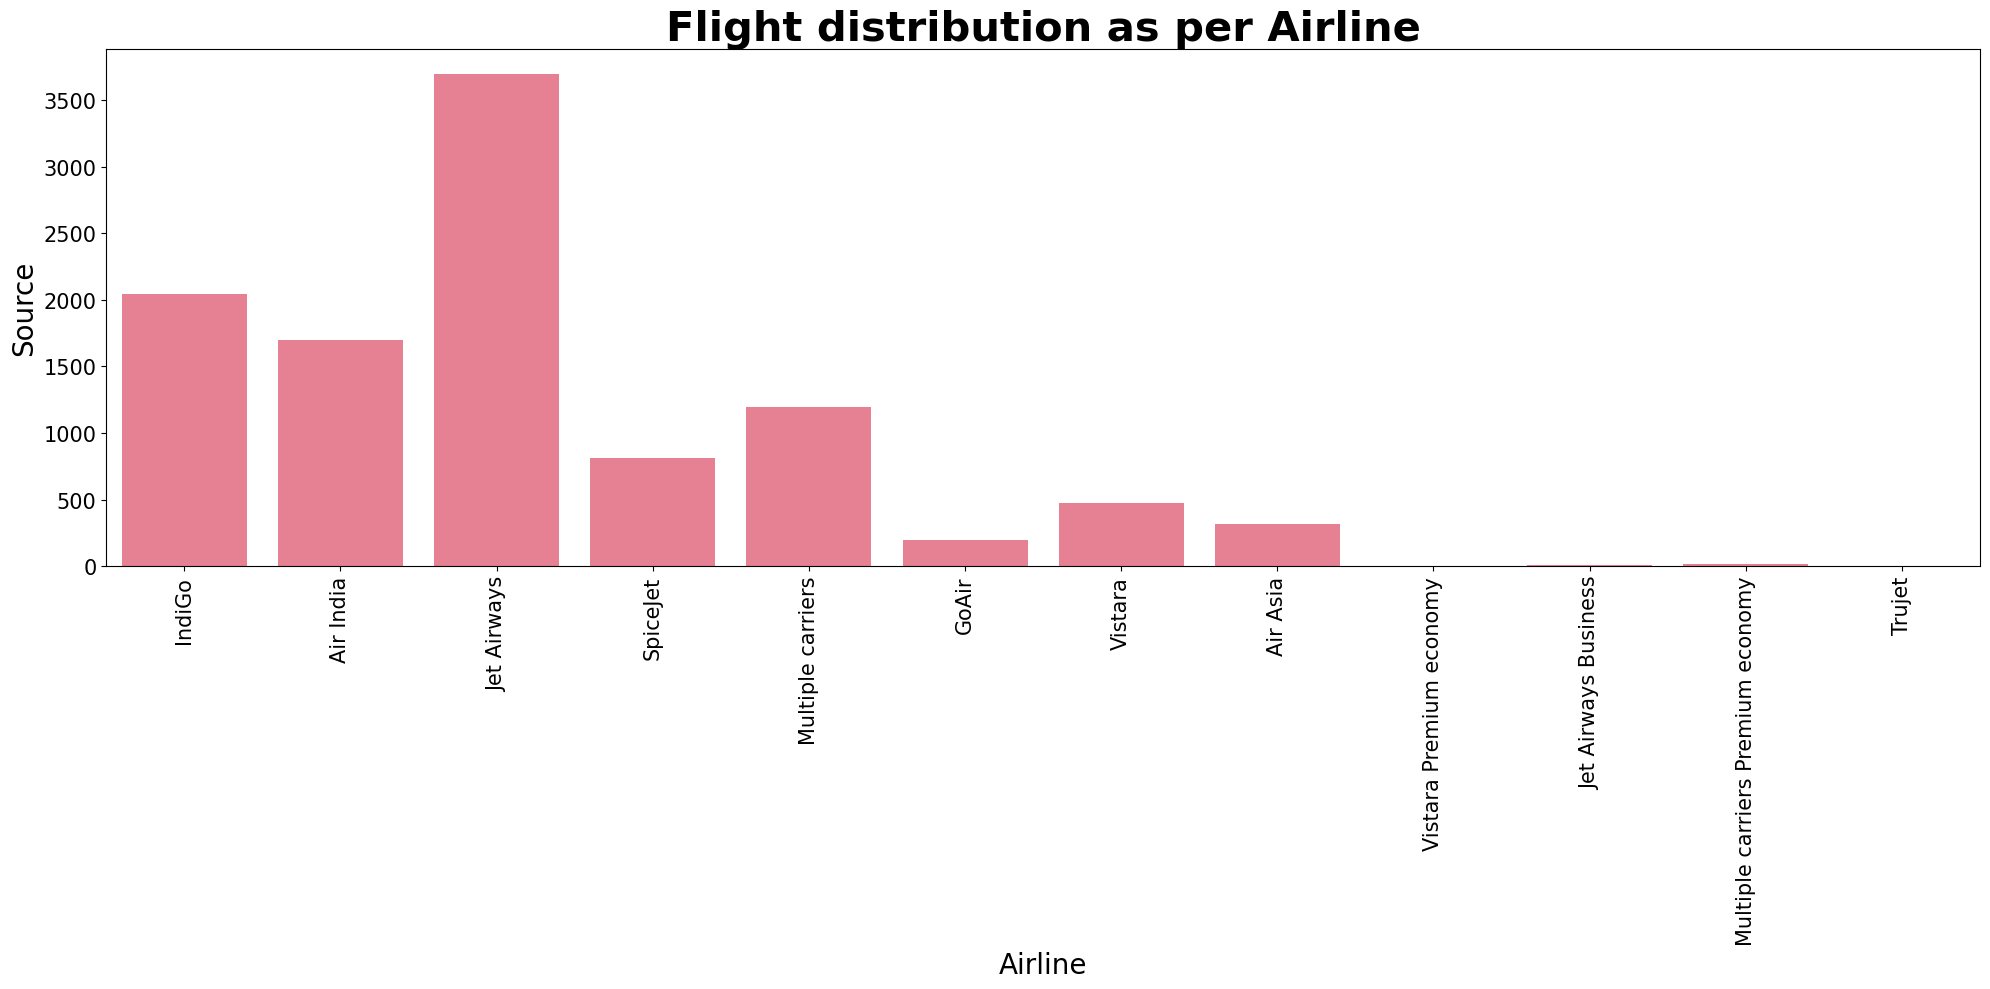

In [62]:
plt.figure(figsize=(20,10))
sns.countplot(x='Airline',data=data)
plt.title('Flight distribution as per Airline',fontsize=30,fontweight='bold')
plt.xlabel('Airline',fontsize=20)
plt.ylabel('Source',fontsize=20)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.show()

#### Insights
* More people travelled via Jet airways.
* There are very few premium classes.

### Price according to the Airlines

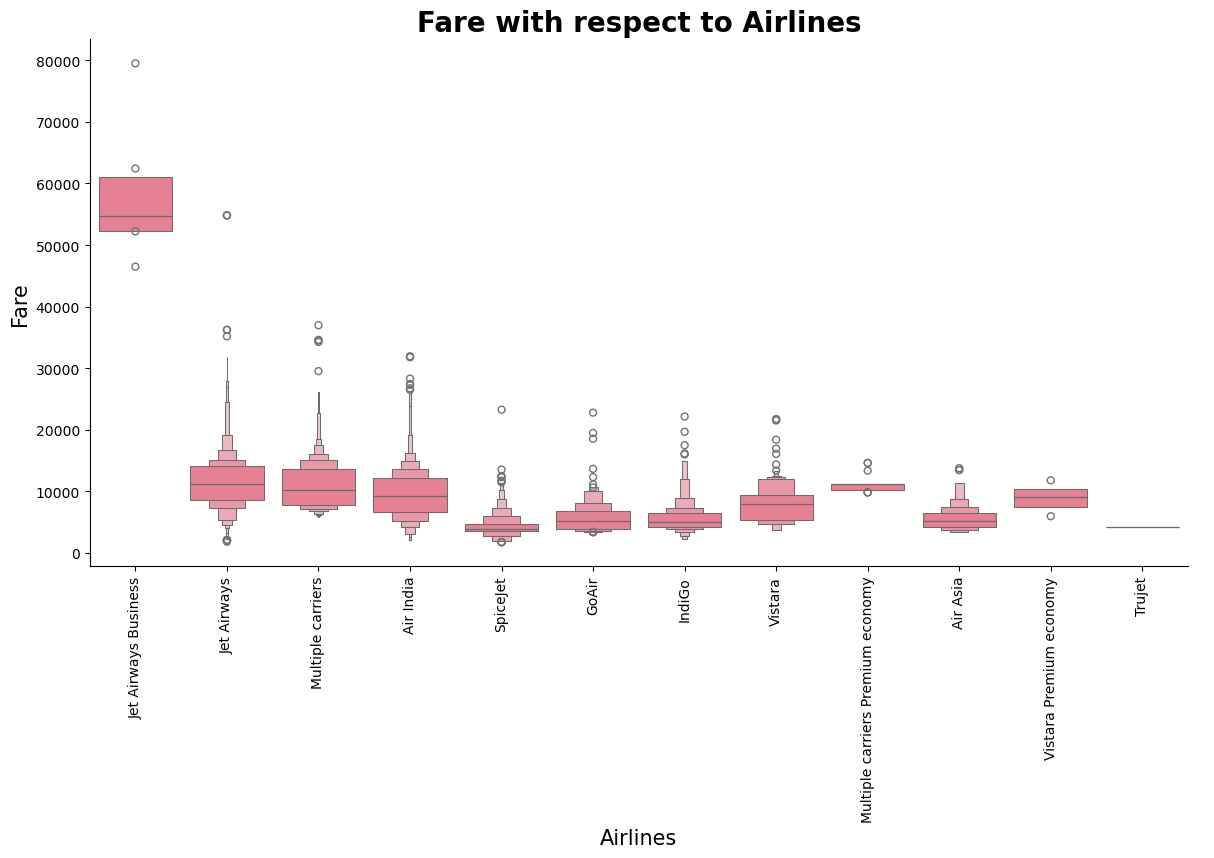

In [63]:
sns.catplot(x='Airline',y='Price',data=data.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=2)
plt.title('Fare with respect to Airlines',fontsize=20,fontweight='bold')
plt.xlabel('Airlines',fontsize=15)
plt.ylabel('Fare',fontsize=15)
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.show()

#### Insights
* Among all airways, Jet airways has the maximum price.
* Goair and Indigo airlines have the similar ticket price.

### Duration and Price

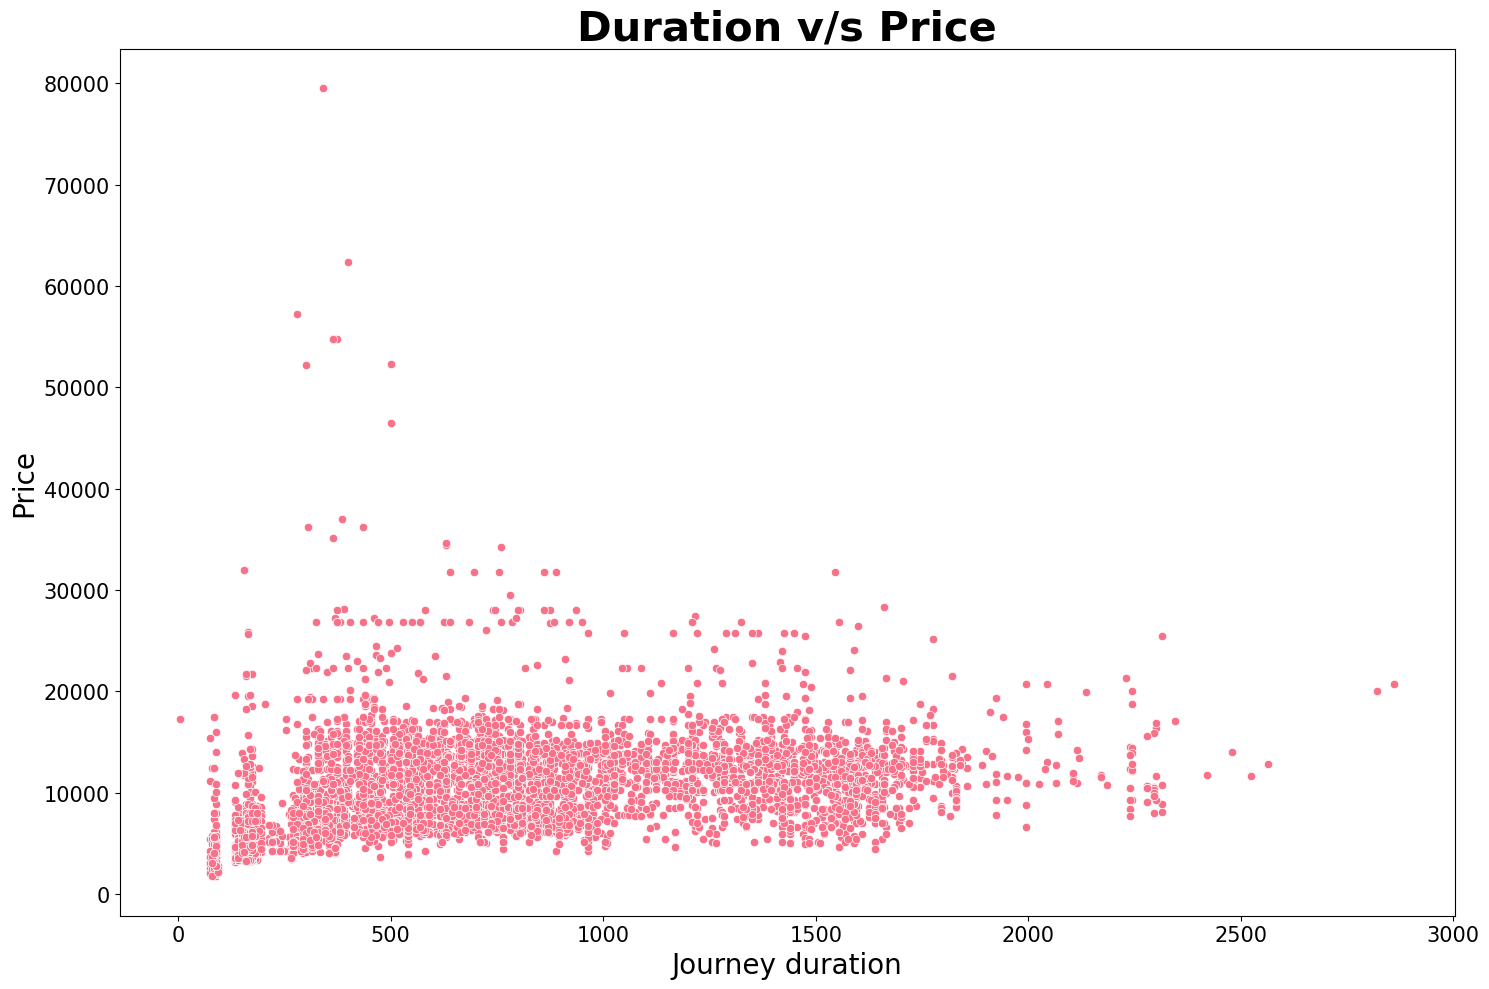

In [64]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Duration',y='Price',data=data)
plt.title('Duration v/s Price',fontsize=30,fontweight='bold')
plt.xlabel('Journey duration',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### Insights
* Duration and price are usually directly proportional. But here we can't see any proportionality. This is maybe other factors affecting both of these.

### Total Stops v/s Price

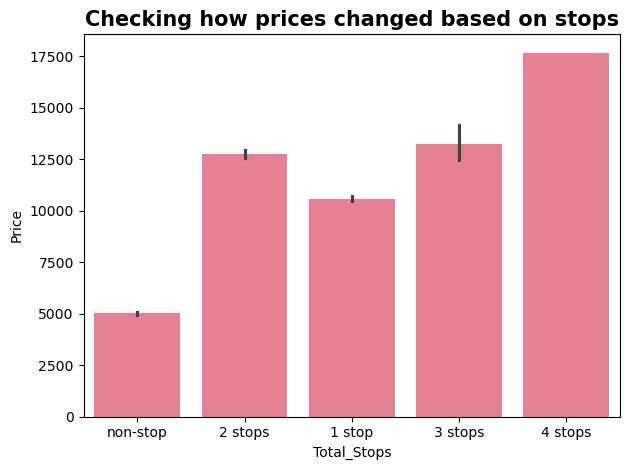

In [68]:
sns.barplot(x='Total_Stops',y='Price',data=data)
plt.title('Checking how prices changed based on stops',fontsize=15,fontweight='bold')
plt.show()

#### Insights
* As the number of stops increases, the fare also increases.

### Journey day, Journey month, Dep hour and Dep min v/s Price

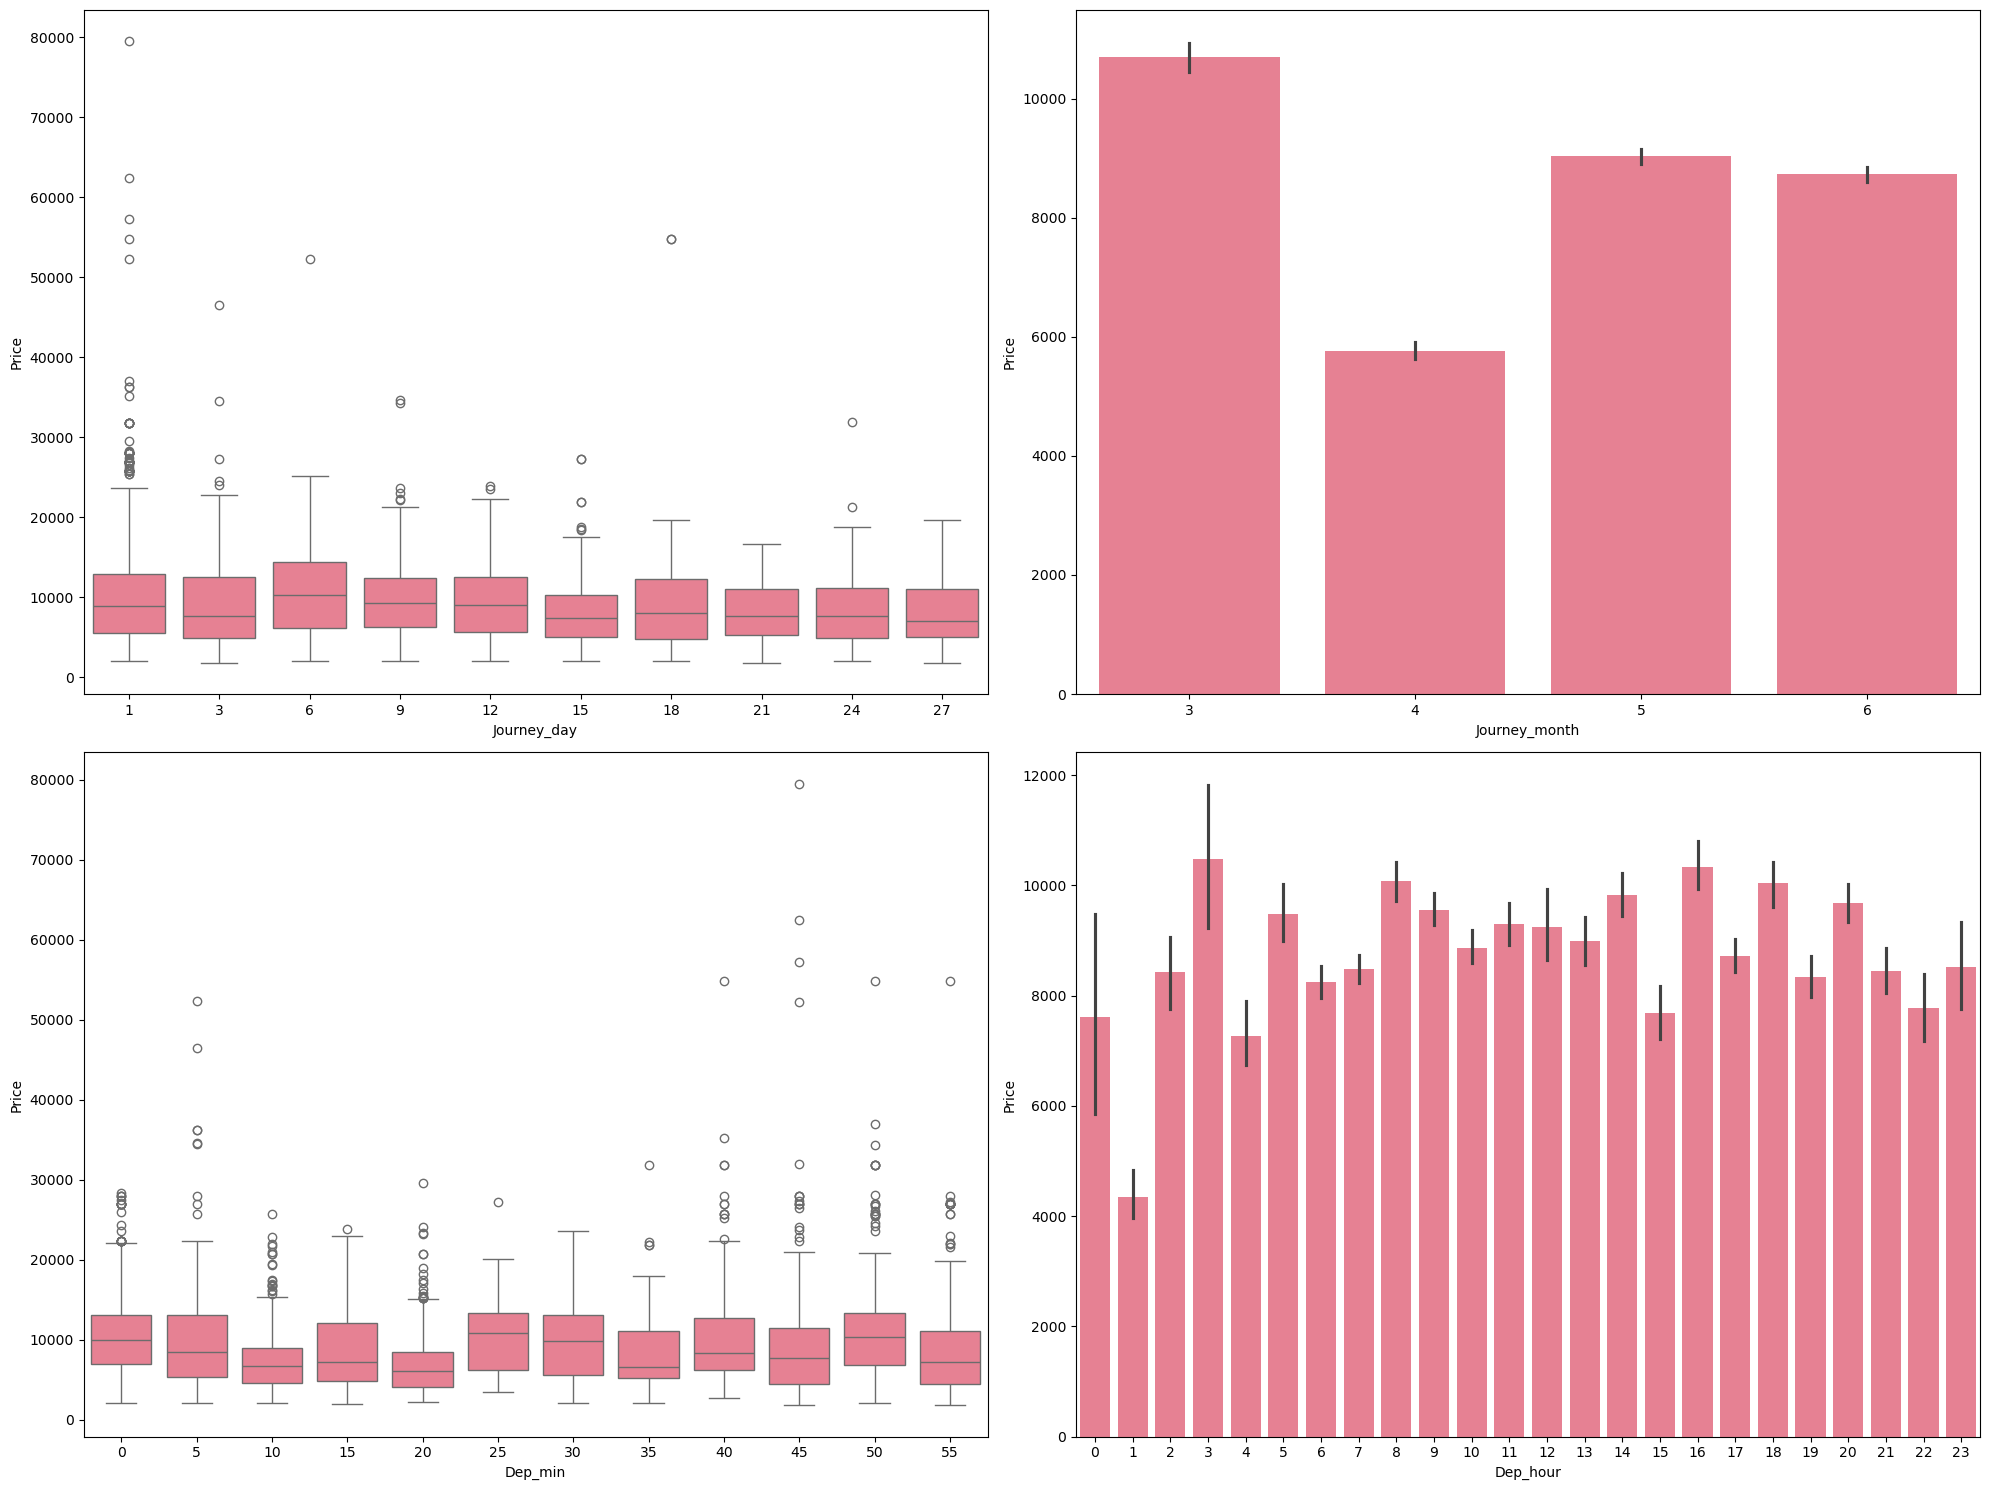

In [70]:
f,ax = plt.subplots(2,2,figsize=(20,15))

sns.boxplot(x='Journey_day',y='Price',data=data,ax=ax[0,0])

sns.barplot(x='Journey_month',y='Price',data=data,ax=ax[0,1])

sns.boxplot(x='Dep_min',y='Price',data=data,ax=ax[1,0])

sns.barplot(x='Dep_hour',y='Price',data=data,ax=ax[1,1])

plt.show()

#### Insights
* Ticket price is high on day 3 followed by day 18.
* Ticket price is high on January month while it's very less on April.

## Converting categorical data into numerical using Label Encoder

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical:
    data[i]=le.fit_transform(data[i])
data

Airline  Source  Destination  Route  Duration  Total_Stops  \
0            3       0            2     18       170            4   
1            1       3            0     84       445            1   
2            4       2            1    118      1140            1   
3            3       3            0     91       325            0   
4            3       0            2     29       285            0   
...        ...     ...          ...    ...       ...          ...   
10678        0       3            0     64       150            4   
10679        1       3            0     64       155            4   
10680        4       0            2     18       180            4   
10681       10       0            2     18       160            4   
10682        1       2            1    108       500            1   

       Additional_Info  Price  Journey_day  Journey_month  Dep_hour  Dep_min  \
0                    7   3897           24              3        22       20   
1                    7   7662            1              5         5       50   
2                    7  13882            9              6         9       25   
3                    7   6218           12              5        18        5   
4                    7  13302            1              3        16       50   
...                ...    ...          ...            ...       ...      ...   
10678                7   4107            9              4        19       55   
10679                7   4145           27              4        20       45   
10680                7   7229           27              4         8       20   
10681                7  12648            1              3        11       30   
10682                7  11753            9              5        10       55   

       Arrival_hour  Arrival_min  
0                 1           10  
1                13           15  
2                 4           25  
3                23           30  
4                21           35  
...             ...          ...  
10678            22           25  
10679            23           20  
10680            11           20  
10681            14           10  
10682            19           15  

[10461 rows x 14 columns]

In [72]:
data.columns.to_series().groupby(data.dtypes).groups

{int32: ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min'], int64: ['Duration', 'Price']}

# Feature selection and Engineering

## Outliers detection and removal

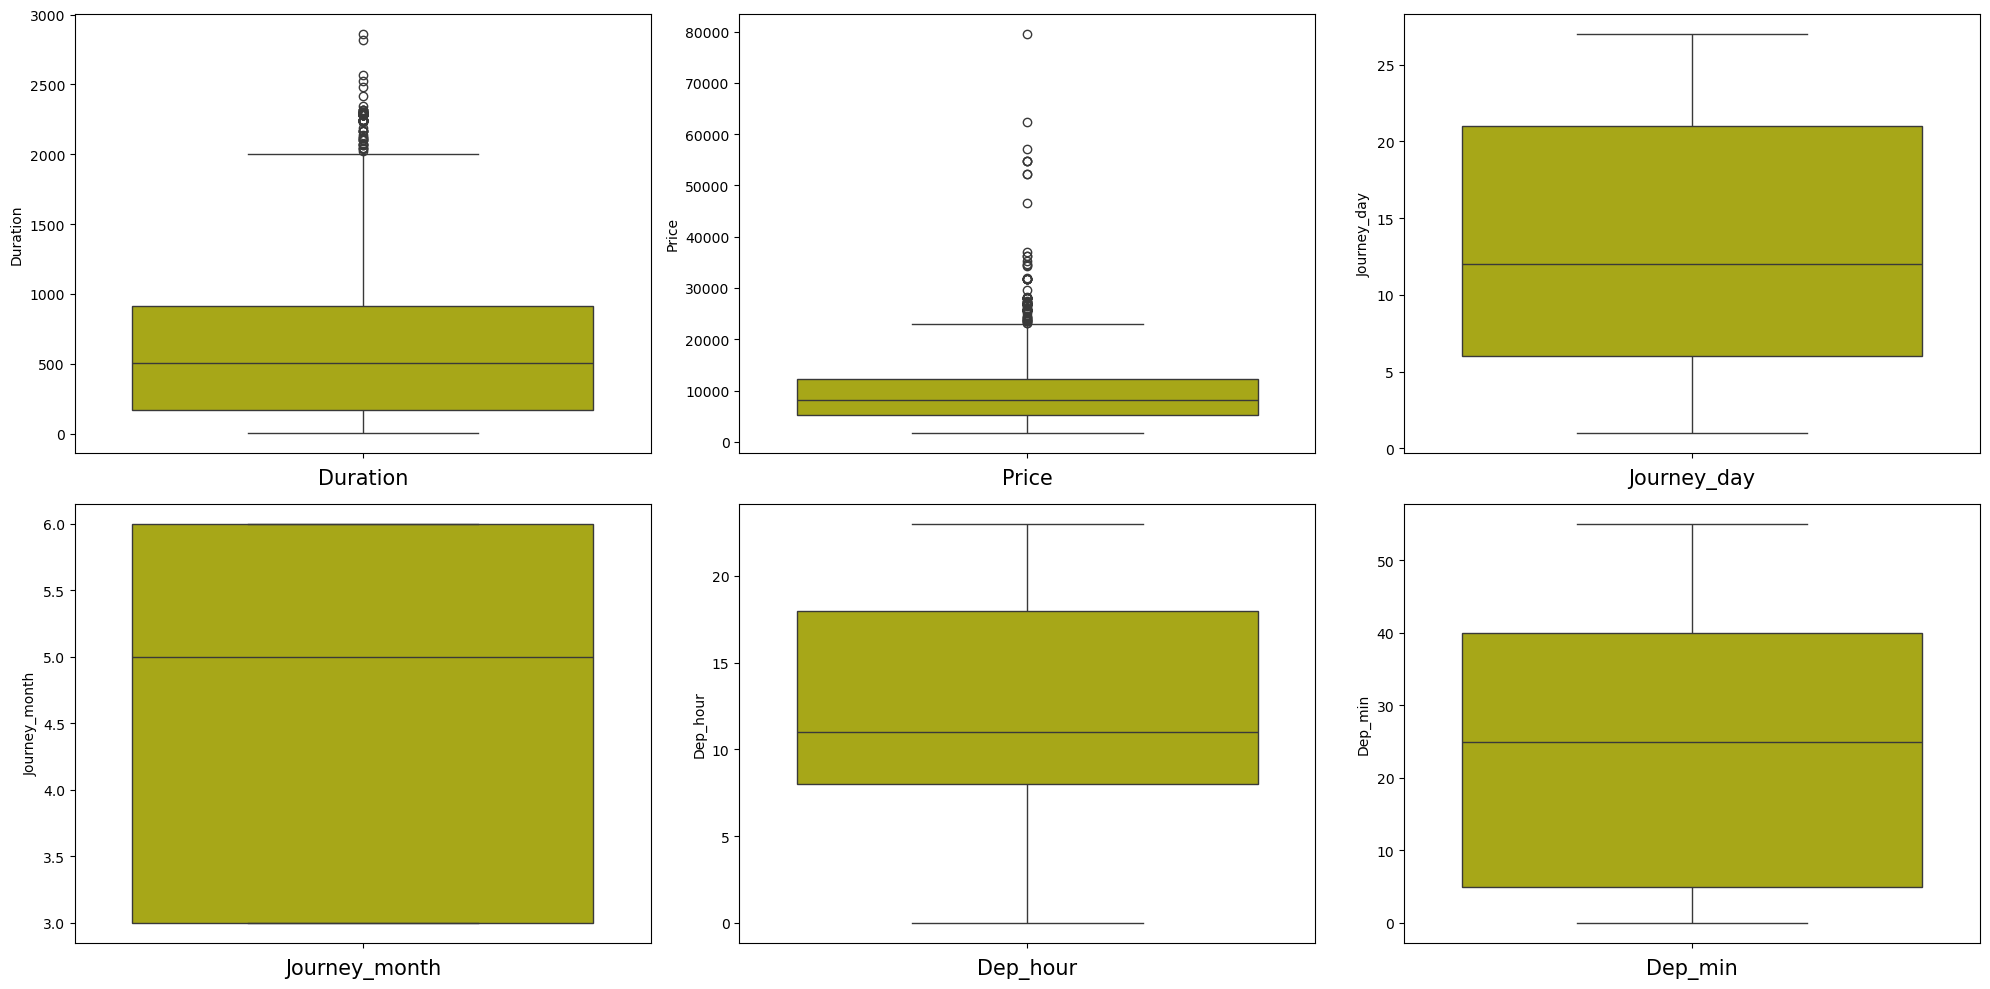

In [73]:
plt.figure(figsize=(20,10))
plotnumber=1

for column in numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(data[column],color='y')
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

#### Insights
* There are outliers in Duration, Journey day and Journey month.

#### Imputing outliers in Duration with median

In [74]:
q1 = data.Duration.quantile(.25)
q3 = data.Duration.quantile(.75)
IQR = q3-q1
lower_limit = q1 - (1.5*IQR)
upper_limit = q3 + (1.5*IQR)

In [75]:
data[data.Duration<lower_limit]

Empty DataFrame
Columns: [Airline, Source, Destination, Route, Duration, Total_Stops, Additional_Info, Price, Journey_day, Journey_month, Dep_hour, Dep_min, Arrival_hour, Arrival_min]
Index: []

In [76]:
data[data.Duration>upper_limit]

Airline  Source  Destination  Route  Duration  Total_Stops  \
226          4       2            1    113      2245            1   
470          4       2            1    126      2045            1   
553          1       2            1     97      2295            1   
919          1       3            0     63      2115            2   
925          4       2            1    107      2135            1   
...        ...     ...          ...    ...       ...          ...   
9703         1       2            1    102      2240            1   
10020        1       2            1     97      2295            1   
10326        1       0            2     16      2420            1   
10456        4       2            1     97      2860            1   
10639        1       2            1    124      2280            2   

       Additional_Info  Price  Journey_day  Journey_month  Dep_hour  Dep_min  \
226                  7  18799            3              3         5       25   
470                  7  13082           21              3        18       20   
553                  7  10598            9              3         5        0   
919                  7  10991           12              5        12        0   
925                  7  19907            6              3        16       50   
...                ...    ...          ...            ...       ...      ...   
9703                 7  13748            3              3         5       55   
10020                7   9653            9              5         5        0   
10326                7  11791            3              3         5       50   
10456                7  20694            6              3        19       10   
10639                7  10493            3              6         5       15   

       Arrival_hour  Arrival_min  
226              18           50  
470               4           25  
553              19           15  
919              23           15  
925               4           25  
...             ...          ...  
9703             19           15  
10020            19           15  
10326            22           10  
10456            18           50  
10639            19           15  

[75 rows x 14 columns]

In [77]:
data.Duration.median()

505.0

In [79]:
#imputing outliers with median since it is not normal distribution
data.loc[data.Duration>upper_limit,'Duration']=505.0

#### Imputing outliers in Journey_month with median

In [80]:
q1 = data.Journey_month.quantile(.25)
q3 = data.Journey_month.quantile(.75)
IQR = q3-q1
lower_limit1 = q1 - (1.5*IQR)
upper_limit1 = q3 + (1.5*IQR)

In [81]:
data[data.Journey_month>upper_limit1]

Empty DataFrame
Columns: [Airline, Source, Destination, Route, Duration, Total_Stops, Additional_Info, Price, Journey_day, Journey_month, Dep_hour, Dep_min, Arrival_hour, Arrival_min]
Index: []

In [82]:
(data[data.Journey_month>upper_limit1].shape[0]/data.shape[0])*100

0.0

#### Insights
* The outliers are about 10%. So we do not impute them

## Correlation

In [83]:
data.corr()

Airline    Source  Destination     Route  Duration  \
Airline          1.000000 -0.012048     0.068618  0.029681 -0.138355   
Source          -0.012048  1.000000    -0.432494  0.403587  0.170424   
Destination      0.068618 -0.432494     1.000000 -0.229323 -0.397083   
Route            0.029681  0.403587    -0.229323  1.000000  0.268953   
Duration        -0.138355  0.170424    -0.397083  0.268953  1.000000   
Total_Stops      0.034396 -0.222515     0.509205 -0.435871 -0.630513   
Additional_Info -0.075468 -0.015212     0.058760  0.051149 -0.167518   
Price           -0.036549  0.013596    -0.260673  0.154196  0.501381   
Journey_day      0.027102  0.005440     0.003586  0.079704 -0.029441   
Journey_month    0.026188  0.180696    -0.149704  0.236358  0.027170   
Dep_hour        -0.032280  0.060771    -0.089346 -0.074781  0.023712   
Dep_min         -0.062383 -0.056734     0.096899 -0.071013 -0.018430   
Arrival_hour    -0.005157  0.027701    -0.061327  0.021043  0.048295   
Arrival_min     -0.072935  0.021073     0.007413 -0.174527 -0.073170   

                 Total_Stops  Additional_Info     Price  Journey_day  \
Airline             0.034396        -0.075468 -0.036549     0.027102   
Source             -0.222515        -0.015212  0.013596     0.005440   
Destination         0.509205         0.058760 -0.260673     0.003586   
Route              -0.435871         0.051149  0.154196     0.079704   
Duration           -0.630513        -0.167518  0.501381    -0.029441   
Total_Stops         1.000000         0.146193 -0.571908     0.030346   
Additional_Info     0.146193         1.000000 -0.067162    -0.012895   
Price              -0.571908        -0.067162  1.000000    -0.158960   
Journey_day         0.030346        -0.012895 -0.158960     1.000000   
Journey_month      -0.021046        -0.043172 -0.113613    -0.038363   
Dep_hour            0.039929        -0.056370  0.005392    -0.003387   
Dep_min             0.049358        -0.022718 -0.024210    -0.004928   
Arrival_hour       -0.098865         0.026803  0.030841    -0.002428   
Arrival_min         0.177065         0.042353 -0.086295    -0.015125   

                 Journey_month  Dep_hour   Dep_min  Arrival_hour  Arrival_min  
Airline               0.026188 -0.032280 -0.062383     -0.005157    -0.072935  
Source                0.180696  0.060771 -0.056734      0.027701     0.021073  
Destination          -0.149704 -0.089346  0.096899     -0.061327     0.007413  
Route                 0.236358 -0.074781 -0.071013      0.021043    -0.174527  
Duration              0.027170  0.023712 -0.018430      0.048295    -0.073170  
Total_Stops          -0.021046  0.039929  0.049358     -0.098865     0.177065  
Additional_Info      -0.043172 -0.056370 -0.022718      0.026803     0.042353  
Price                -0.113613  0.005392 -0.024210      0.030841    -0.086295  
Journey_day          -0.038363 -0.003387 -0.004928     -0.002428    -0.015125  
Journey_month         1.000000  0.040874 -0.062723      0.000902    -0.099581  
Dep_hour              0.040874  1.000000 -0.015032     -0.003222     0.073340  
Dep_min              -0.062723 -0.015032  1.000000      0.046372    -0.021437  
Arrival_hour          0.000902 -0.003222  0.046372      1.000000    -0.152461  
Arrival_min          -0.099581  0.073340 -0.021437     -0.152461     1.000000

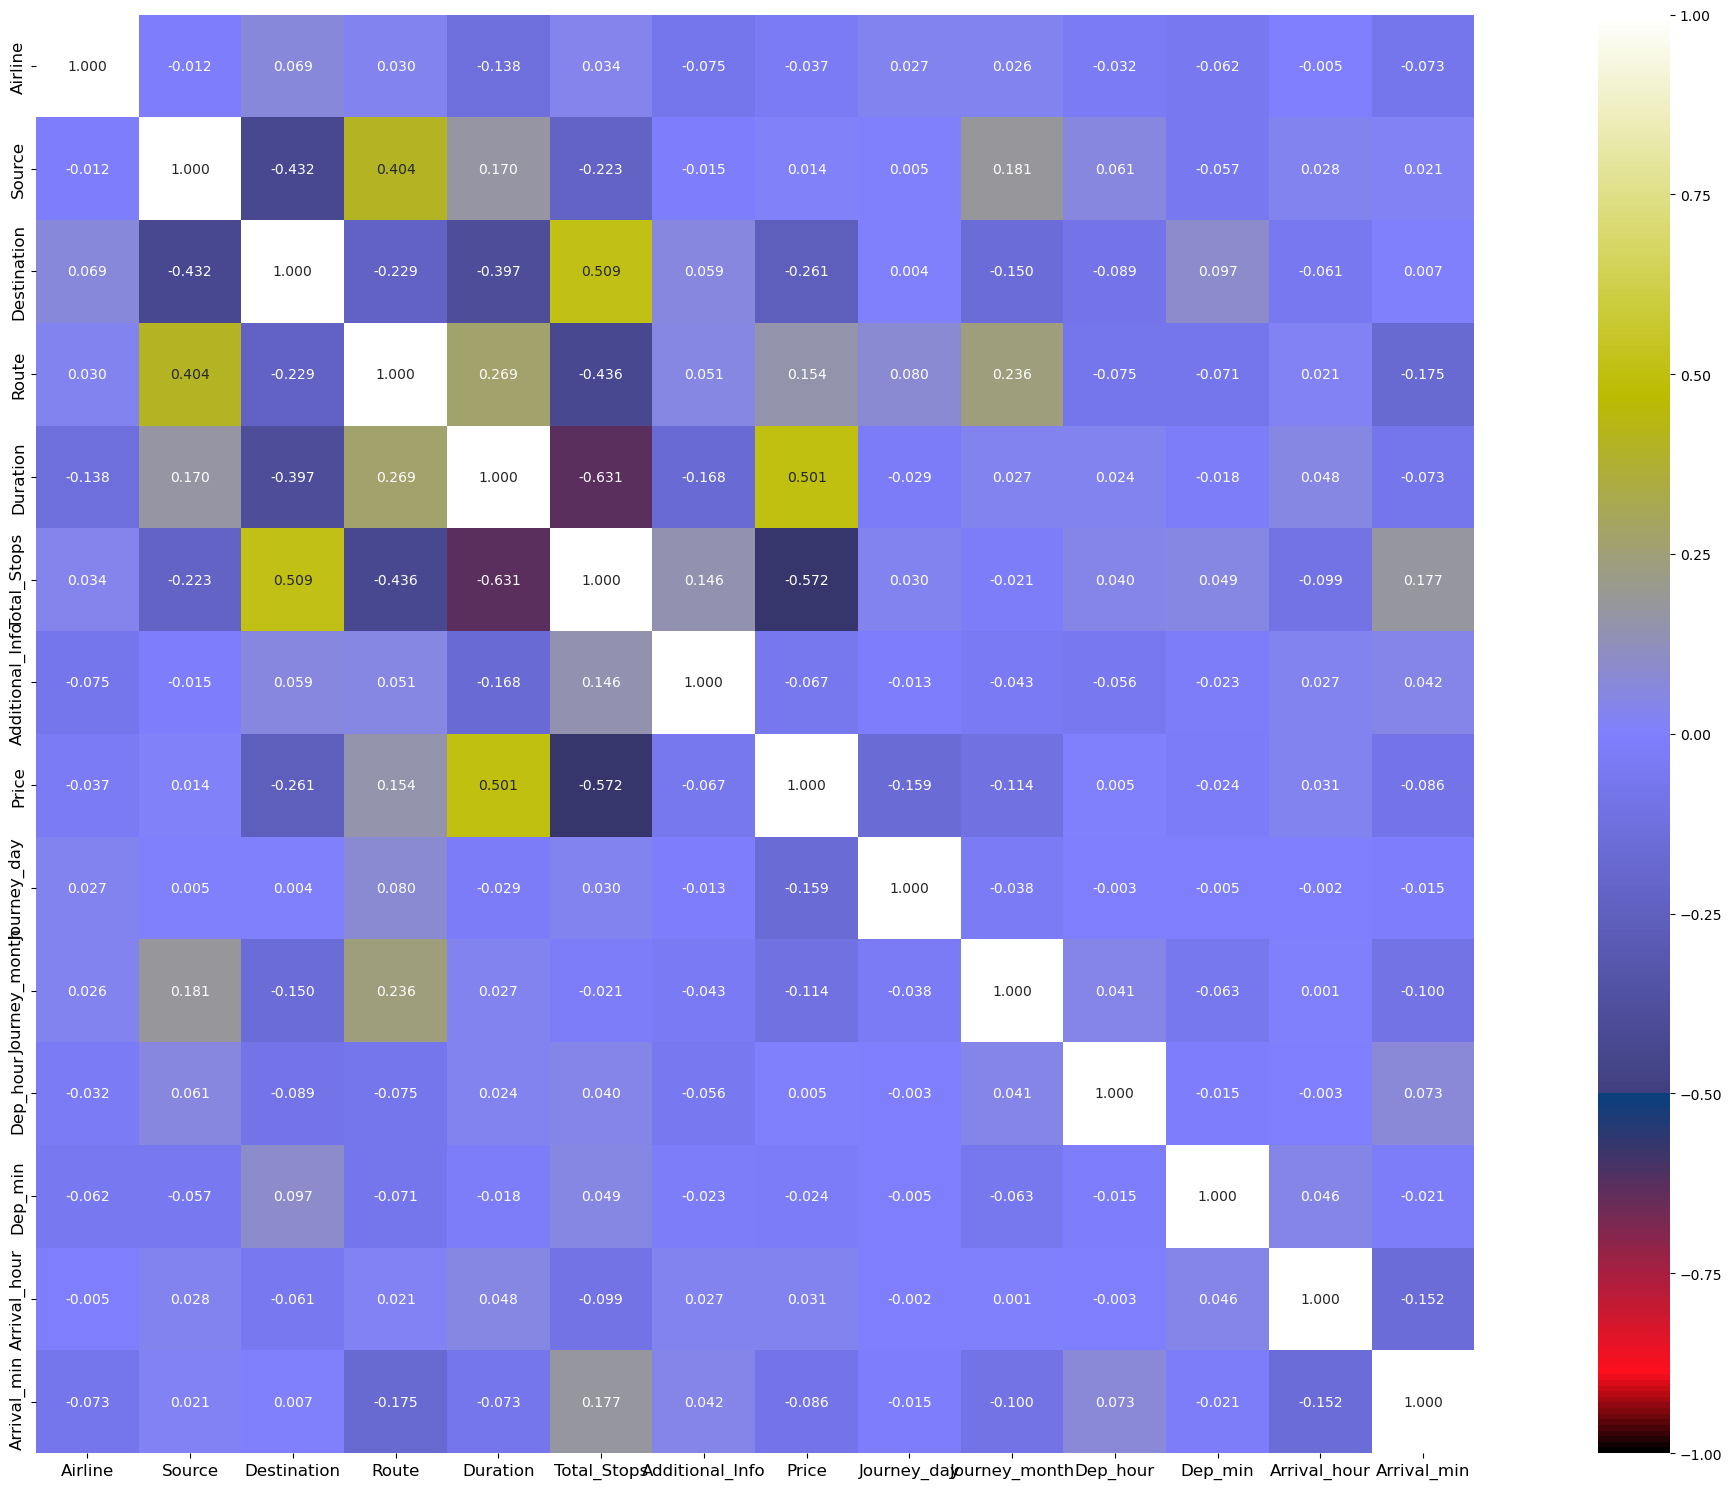

In [84]:
#heatmap
plt.figure(figsize=(25,15))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Splitting the data

In [85]:
#splitting
x = data.drop('Additional_Info',axis=1,inplace=True)
x =  data.drop('Price',axis=1)
y = data.Price

## Scaling the data using Standard scaler

In [86]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x = sc.fit_transform(x)

## Machine learning model building

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
!pip install prettytable
from prettytable import PrettyTable

In [88]:
#splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=214,test_size=0.25)
print('Training data shape :',x_train.shape)
print('Testing data shape :',x_test.shape)

Training data shape : (7845, 12)
Testing data shape : (2616, 12)


## Linear regression Base Model

In [89]:
lnr = LinearRegression()
lnr_model = lnr.fit(x_train,y_train)
y_pred = lnr_model.predict(x_test)
print('Mean squarred error :',mean_squared_error(y_test,y_pred))
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('R2 score :',r2_score(y_test,y_pred))

Mean squarred error : 11973975.01757733
Mean absolute error : 2535.3058113795973
R2 score : 0.42420968102860357


### Cross Validation

In [90]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lnr_model,x,y,cv=3)
print('Mean CV Score :',score.mean())

Mean CV Score : 0.4076486333099223


## Applying other ML models

In [91]:
from sklearn.ensemble import BaggingRegressor
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
et = ExtraTreesRegressor()
br = BaggingRegressor()
adb = AdaBoostRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()

models = [rf,et,dt,adb,xgb,gb,br]
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    y_pred = m.predict(x_test)
    y_pred_train = m.predict(x_train)
    print('\n')
    print('\033[1m',m,':'+'\033[0m')
    print('\n')
    print('\033[1m'+'Test accuracy :-'+'\033[0m')
    print('Mean squarred error :',mean_squared_error(y_test,y_pred))
    print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
    print('Root mean squarred error :',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('R2 Score:',r2_score(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Train Accuracy :-'+'\033[0m')
    print('Mean squarred error :',mean_squared_error(y_train,y_pred_train))
    print('Mean absolute error :',mean_absolute_error(y_train,y_pred_train))
    print('Root mean squarred error :',np.sqrt(mean_squared_error(y_train,y_pred_train)))
    print('R2 Score:',r2_score(y_train,y_pred_train))
    print('=======================================')



 RandomForestRegressor() :


Test accuracy :-
Mean squarred error : 3774891.7857363583
Mean absolute error : 1153.870659107871
Root mean squarred error : 1942.9080744431421
R2 Score: 0.8184774778466666


Train Accuracy :-
Mean squarred error : 1017875.9826531511
Mean absolute error : 564.9891921555537
Root mean squarred error : 1008.8984005603097
R2 Score: 0.9528405936585959


 ExtraTreesRegressor() :


Test accuracy :-
Mean squarred error : 4119664.379080628
Mean absolute error : 1179.4023660168195
Root mean squarred error : 2029.6956370551295
R2 Score: 0.8018984620058219


Train Accuracy :-
Mean squarred error : 611316.1990634162
Mean absolute error : 302.46489653707243
Root mean squarred error : 781.8671236619533
R2 Score: 0.9716769925550566


 DecisionTreeRegressor() :


Test accuracy :-
Mean squarred error : 6651365.541478084
Mean absolute error : 1331.1137104994903
Root mean squarred error : 2579.0241451909837
R2 Score: 0.6801570171057618


Train Accuracy :-
Mean squarred error

## Cross validation

In [92]:
for m in models:
    score = cross_val_score(m,x,y,cv=5)
    print('\n')
    print('Cross validation score :',m)
    print('Mean CV Score :',score.mean())
    print('\n')
    print('================================')



Cross validation score : RandomForestRegressor()
Mean CV Score : 0.7989135906113943




Cross validation score : ExtraTreesRegressor()
Mean CV Score : 0.7815118704430236




Cross validation score : DecisionTreeRegressor()
Mean CV Score : 0.6516442311030681




Cross validation score : AdaBoostRegressor()
Mean CV Score : 0.3206120069583516




Cross validation score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
       

#### Insights
* We are getting r2 score as 90.41 and CV score as 89.91 for ExtraTreesRegressor and as 90.67 and 89.28 for XGBRegressor. So we will do hyper parameter tuning for these model.

## Hyper Parameter Tuning

In [52]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 787.7 kB/s eta 0:02:39
   ---------------------------------------- 0.1/124.9 MB 880.9 kB/s eta 0:02:22
   ---------------------------------------- 0.2/124.9 MB 952.6 kB/s eta 0:02:11
   ---------------------------------------- 0.2/124.9 MB 1.1 MB/s eta 0:01:58
   ---------------------------------------- 0.3/124.9 MB 1.0 MB/s eta 0:02:00
   ---------------------------------------- 0.3/124.9 MB 1.1 MB/s eta 0:01:53
   ---------------------------------------- 0.4/124.9 MB 1.0 MB/s eta 0:02:00
   ---------------------------------------- 0.5/124.9 MB 1.2 MB/s eta 0:01:48
   ---------------------------------------- 0.5/124.9 MB 1.1 MB/s eta 0:01:51
   ---------------------------------------- 0.6/124.9 MB 1.2 MB/s eta 0:01:46
   ---------------------------------------- 0.6/124.9 MB 1.2 MB/s eta 0:

In [53]:
from xgboost import XGBRegressor


In [54]:
from sklearn.model_selection import GridSearchCV

#parameters for XGBRegressor
xgb_param = {'n_estimators':[50,60,75,100],
             'gamma':np.arange(0,0.2,0.1),
            'booster':['gbtree','dart','gblinear'],
             'max_depth':[2,4,6,8],
            'eta':[0.001,0.01,0.1]}

#parameters for ExtraTreesregressor
et_param = {'n_estimators': [50,60,75,100,150], 
    'max_features': ['auto', 'sqrt'],     
    'max_depth': np.arange(10, 110, 20),  
    'min_samples_split': [2, 5, 10],        
    'min_samples_leaf': [1, 2, 4],         
    'bootstrap': [True, False]}


In [55]:
GCV_xgb = GridSearchCV(XGBRegressor(),param_grid=xgb_param,verbose=10)

In [93]:
GCV_xgb.fit(x_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50
[CV 1/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50;, score=0.045 total time=   0.0s
[CV 2/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50
[CV 2/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50;, score=0.033 total time=   0.0s
[CV 3/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50
[CV 3/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50;, score=0.042 total time=   0.0s
[CV 4/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50
[CV 4/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50;, score=0.043 total time=   0.0s
[CV 5/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=2, n_estimators=50
[CV 5/5; 1/

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'booster': ['gbtree', 'dart', 'gblinear'],
                         'eta': [0.001, 0.01, 0.1], 'gamma': array([0. , 0.1]),
                         'max_depth': [2, 4, 6, 8],
                         'n_estimators': [50, 60, 75, 100]},
             verbose=10)

[CV 2/5; 50/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=2, n_estimators=60;, score=-0.742 total time=   0.0s
[CV 3/5; 50/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=2, n_estimators=60
[CV 3/5; 50/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=2, n_estimators=60;, score=-0.800 total time=   0.0s
[CV 4/5; 50/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=2, n_estimators=60
[CV 4/5; 50/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=2, n_estimators=60;, score=-0.789 total time=   0.0s
[CV 5/5; 50/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=2, n_estimators=60
[CV 5/5; 50/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=2, n_estimators=60;, score=-0.789 total time=   0.0s
[CV 1/5; 51/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=2, n_estimators=75
[CV 1/5; 51/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=2, n_estimators=75;, score=-0.475 total time=   0.0s
[CV 2/5; 51/288] START booster=gbtree, 

[CV 3/5; 58/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=60;, score=-0.657 total time=   0.0s
[CV 4/5; 58/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=60
[CV 4/5; 58/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=60;, score=-0.658 total time=   0.0s
[CV 5/5; 58/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=60
[CV 5/5; 58/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=60;, score=-0.692 total time=   0.0s
[CV 1/5; 59/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75
[CV 1/5; 59/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75;, score=-0.369 total time=   0.0s
[CV 2/5; 59/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75
[CV 2/5; 59/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75;, score=-0.242 total time=   0.0s
[CV 3/5; 59/288] START booster=gbtree, 

[CV 3/5; 66/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=2, n_estimators=60;, score=0.690 total time=   0.0s
[CV 4/5; 66/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=2, n_estimators=60
[CV 4/5; 66/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=2, n_estimators=60;, score=0.699 total time=   0.0s
[CV 5/5; 66/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=2, n_estimators=60
[CV 5/5; 66/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=2, n_estimators=60;, score=0.653 total time=   0.0s
[CV 1/5; 67/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=2, n_estimators=75
[CV 1/5; 67/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=2, n_estimators=75;, score=0.689 total time=   0.0s
[CV 2/5; 67/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=2, n_estimators=75
[CV 2/5; 67/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=2, n_estimators=75;, score=0.652 total time=   0.0s
[CV 3/5; 67/288] START booster=gbtree, eta=0.1, gamma

[CV 3/5; 74/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=60;, score=0.809 total time=   0.0s
[CV 4/5; 74/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=60
[CV 4/5; 74/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=60;, score=0.832 total time=   0.0s
[CV 5/5; 74/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=60
[CV 5/5; 74/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=60;, score=0.790 total time=   0.0s
[CV 1/5; 75/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=75
[CV 1/5; 75/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=75;, score=0.795 total time=   0.0s
[CV 2/5; 75/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=75
[CV 2/5; 75/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=75;, score=0.831 total time=   0.0s
[CV 3/5; 75/288] START booster=gbtree, eta=0.1, gamma

[CV 3/5; 83/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=2, n_estimators=75;, score=0.702 total time=   0.0s
[CV 4/5; 83/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=2, n_estimators=75
[CV 4/5; 83/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=2, n_estimators=75;, score=0.722 total time=   0.0s
[CV 5/5; 83/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=2, n_estimators=75
[CV 5/5; 83/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=2, n_estimators=75;, score=0.662 total time=   0.0s
[CV 1/5; 84/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=2, n_estimators=100
[CV 1/5; 84/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=2, n_estimators=100;, score=0.701 total time=   0.0s
[CV 2/5; 84/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=2, n_estimators=100
[CV 2/5; 84/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=2, n_estimators=100;, score=0.675 total time=   0.0s
[CV 3/5; 84/288] START booster=gbtree, eta=0.1, g

[CV 4/5; 91/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75;, score=0.836 total time=   0.0s
[CV 5/5; 91/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75
[CV 5/5; 91/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75;, score=0.796 total time=   0.0s
[CV 1/5; 92/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=100
[CV 1/5; 92/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=100;, score=0.799 total time=   0.0s
[CV 2/5; 92/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=100
[CV 2/5; 92/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=100;, score=0.834 total time=   0.0s
[CV 3/5; 92/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=100
[CV 3/5; 92/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=100;, score=0.821 total time=   0.0s
[CV 4/5; 92/288] START booster=gbtree, eta=0.1,

[CV 4/5; 99/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=2, n_estimators=75;, score=-3.282 total time=   0.3s
[CV 5/5; 99/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=2, n_estimators=75
[CV 5/5; 99/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=2, n_estimators=75;, score=-3.318 total time=   0.3s
[CV 1/5; 100/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=2, n_estimators=100
[CV 1/5; 100/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=2, n_estimators=100;, score=-3.208 total time=   0.5s
[CV 2/5; 100/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=2, n_estimators=100
[CV 2/5; 100/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=2, n_estimators=100;, score=-2.714 total time=   0.5s
[CV 3/5; 100/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=2, n_estimators=100
[CV 3/5; 100/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=2, n_estimators=100;, score=-3.007 total time=   0.5s
[CV 4/5; 100/288] START booster=dart

[CV 3/5; 107/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=75;, score=-3.160 total time=   0.4s
[CV 4/5; 107/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=75
[CV 4/5; 107/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=75;, score=-3.256 total time=   0.4s
[CV 5/5; 107/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=75
[CV 5/5; 107/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=75;, score=-3.300 total time=   0.4s
[CV 1/5; 108/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=100
[CV 1/5; 108/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=100;, score=-3.186 total time=   0.7s
[CV 2/5; 108/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=100
[CV 2/5; 108/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=100;, score=-2.674 total time=   0.7s
[CV 3/5; 108/288] START booster=dar

[CV 2/5; 115/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=2, n_estimators=75;, score=-2.872 total time=   0.3s
[CV 3/5; 115/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=2, n_estimators=75
[CV 3/5; 115/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=2, n_estimators=75;, score=-3.185 total time=   0.3s
[CV 4/5; 115/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=2, n_estimators=75
[CV 4/5; 115/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=2, n_estimators=75;, score=-3.282 total time=   0.3s
[CV 5/5; 115/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=2, n_estimators=75
[CV 5/5; 115/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=2, n_estimators=75;, score=-3.318 total time=   0.3s
[CV 1/5; 116/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=2, n_estimators=100
[CV 1/5; 116/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=2, n_estimators=100;, score=-3.208 total time=   0.5s
[CV 2/5; 116/288] START booster=dart,

[CV 1/5; 123/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=-3.383 total time=   0.4s
[CV 2/5; 123/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75
[CV 2/5; 123/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=-2.842 total time=   0.4s
[CV 3/5; 123/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75
[CV 3/5; 123/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=-3.160 total time=   0.4s
[CV 4/5; 123/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75
[CV 4/5; 123/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=-3.256 total time=   0.4s
[CV 5/5; 123/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75
[CV 5/5; 123/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=-3.300 total time=   0.4s
[CV 1/5; 124/288] START booster=dart, e

[CV 1/5; 131/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=2, n_estimators=75;, score=-0.475 total time=   0.3s
[CV 2/5; 131/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=2, n_estimators=75
[CV 2/5; 131/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=2, n_estimators=75;, score=-0.442 total time=   0.3s
[CV 3/5; 131/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=2, n_estimators=75
[CV 3/5; 131/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=2, n_estimators=75;, score=-0.462 total time=   0.3s
[CV 4/5; 131/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=2, n_estimators=75
[CV 4/5; 131/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=2, n_estimators=75;, score=-0.440 total time=   0.3s
[CV 5/5; 131/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=2, n_estimators=75
[CV 5/5; 131/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=2, n_estimators=75;, score=-0.440 total time=   0.3s
[CV 1/5; 132/288] START booster=dart, eta=0.01, 

[CV 1/5; 139/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=75;, score=-0.369 total time=   0.4s
[CV 2/5; 139/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=75
[CV 2/5; 139/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=75;, score=-0.242 total time=   0.4s
[CV 3/5; 139/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=75
[CV 3/5; 139/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=75;, score=-0.303 total time=   0.4s
[CV 4/5; 139/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=75
[CV 4/5; 139/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=75;, score=-0.295 total time=   0.4s
[CV 5/5; 139/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=75
[CV 5/5; 139/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=75;, score=-0.327 total time=   0.4s
[CV 1/5; 140/288] START booster=dart, eta=0.01, 

[CV 1/5; 147/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=2, n_estimators=75;, score=-0.475 total time=   0.3s
[CV 2/5; 147/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=2, n_estimators=75
[CV 2/5; 147/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=2, n_estimators=75;, score=-0.442 total time=   0.3s
[CV 3/5; 147/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=2, n_estimators=75
[CV 3/5; 147/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=2, n_estimators=75;, score=-0.462 total time=   0.3s
[CV 4/5; 147/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=2, n_estimators=75
[CV 4/5; 147/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=2, n_estimators=75;, score=-0.440 total time=   0.3s
[CV 5/5; 147/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=2, n_estimators=75
[CV 5/5; 147/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=2, n_estimators=75;, score=-0.440 total time=   0.3s
[CV 1/5; 148/288] START booster=dart, eta=0.01, 

[CV 1/5; 155/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75;, score=-0.369 total time=   0.4s
[CV 2/5; 155/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75
[CV 2/5; 155/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75;, score=-0.242 total time=   0.4s
[CV 3/5; 155/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75
[CV 3/5; 155/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75;, score=-0.303 total time=   0.4s
[CV 4/5; 155/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75
[CV 4/5; 155/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75;, score=-0.295 total time=   0.4s
[CV 5/5; 155/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75
[CV 5/5; 155/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75;, score=-0.327 total time=   0.4s
[CV 1/5; 156/288] START booster=dart, eta=0.01, 

[CV 1/5; 163/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=2, n_estimators=75;, score=0.689 total time=   0.3s
[CV 2/5; 163/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=2, n_estimators=75
[CV 2/5; 163/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=2, n_estimators=75;, score=0.652 total time=   0.3s
[CV 3/5; 163/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=2, n_estimators=75
[CV 3/5; 163/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=2, n_estimators=75;, score=0.702 total time=   0.3s
[CV 4/5; 163/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=2, n_estimators=75
[CV 4/5; 163/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=2, n_estimators=75;, score=0.722 total time=   0.3s
[CV 5/5; 163/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=2, n_estimators=75
[CV 5/5; 163/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=2, n_estimators=75;, score=0.662 total time=   0.3s
[CV 1/5; 164/288] START booster=dart, eta=0.1, gamma=0.0, max_

[CV 1/5; 171/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=75;, score=0.795 total time=   0.4s
[CV 2/5; 171/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=75
[CV 2/5; 171/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=75;, score=0.831 total time=   0.4s
[CV 3/5; 171/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=75
[CV 3/5; 171/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=75;, score=0.816 total time=   0.4s
[CV 4/5; 171/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=75
[CV 4/5; 171/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=75;, score=0.836 total time=   0.4s
[CV 5/5; 171/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=75
[CV 5/5; 171/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=75;, score=0.796 total time=   0.4s
[CV 1/5; 172/288] START booster=dart, eta=0.1, gamma=0.0, max_

[CV 1/5; 179/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=2, n_estimators=75;, score=0.689 total time=   0.3s
[CV 2/5; 179/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=2, n_estimators=75
[CV 2/5; 179/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=2, n_estimators=75;, score=0.652 total time=   0.3s
[CV 3/5; 179/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=2, n_estimators=75
[CV 3/5; 179/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=2, n_estimators=75;, score=0.702 total time=   0.3s
[CV 4/5; 179/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=2, n_estimators=75
[CV 4/5; 179/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=2, n_estimators=75;, score=0.722 total time=   0.3s
[CV 5/5; 179/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=2, n_estimators=75
[CV 5/5; 179/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=2, n_estimators=75;, score=0.662 total time=   0.3s
[CV 1/5; 180/288] START booster=dart, eta=0.1, gamma=0.1, max_

[CV 1/5; 187/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75;, score=0.795 total time=   0.4s
[CV 2/5; 187/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75
[CV 2/5; 187/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75;, score=0.831 total time=   0.4s
[CV 3/5; 187/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75
[CV 3/5; 187/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75;, score=0.816 total time=   0.4s
[CV 4/5; 187/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75
[CV 4/5; 187/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75;, score=0.836 total time=   0.4s
[CV 5/5; 187/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75
[CV 5/5; 187/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=75;, score=0.796 total time=   0.4s
[CV 1/5; 188/288] START booster=dart, eta=0.1, gamma=0.1, max_

[CV 1/5; 195/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=2, n_estimators=75;, score=-3.373 total time=   0.0s
[CV 2/5; 195/288] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=2, n_estimators=75
[12:59:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 195/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=2, n_estimators=75;, score=-2.857 total time=   0.0s
[CV 3/5; 195/288] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=2, n_estimators=75
[12:59:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 195/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=2, n_estimators=75;, score=-3.165 total time=   0.0s
[CV 4/5; 195/288] START

[CV 2/5; 200/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=4, n_estimators=100;, score=-2.697 total time=   0.0s
[CV 3/5; 200/288] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=4, n_estimators=100
[12:59:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 200/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=4, n_estimators=100;, score=-2.984 total time=   0.0s
[CV 4/5; 200/288] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=4, n_estimators=100
[12:59:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 200/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=4, n_estimators=100;, score=-3.076 total time=   0.0s
[CV 5/5; 200/288] 

[CV 3/5; 205/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=50;, score=-3.357 total time=   0.0s
[CV 4/5; 205/288] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=50
[12:59:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 205/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=50;, score=-3.465 total time=   0.0s
[CV 5/5; 205/288] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=50
[12:59:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 205/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=50;, score=-3.497 total time=   0.0s
[CV 1/5; 206/288] START

[12:59:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 211/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=2, n_estimators=75;, score=-2.857 total time=   0.0s
[CV 3/5; 211/288] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=2, n_estimators=75
[12:59:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 211/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=2, n_estimators=75;, score=-3.165 total time=   0.0s
[CV 4/5; 211/288] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=2, n_estimators=75
[12:59:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.c

[CV 3/5; 216/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=4, n_estimators=100;, score=-2.984 total time=   0.0s
[CV 4/5; 216/288] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=4, n_estimators=100
[12:59:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 216/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=4, n_estimators=100;, score=-3.076 total time=   0.0s
[CV 5/5; 216/288] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=4, n_estimators=100
[12:59:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 216/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=4, n_estimators=100;, score=-3.095 total time=   0.0s
[CV 1/5; 217/288] 

[CV 2/5; 222/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=8, n_estimators=60;, score=-2.958 total time=   0.0s
[CV 3/5; 222/288] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=8, n_estimators=60
[12:59:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 222/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=8, n_estimators=60;, score=-3.279 total time=   0.0s
[CV 4/5; 222/288] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=8, n_estimators=60
[12:59:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 222/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=8, n_estimators=60;, score=-3.383 total time=   0.0s
[CV 5/5; 222/288] START

[CV 5/5; 227/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=2, n_estimators=75;, score=-0.472 total time=   0.0s
[CV 1/5; 228/288] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=2, n_estimators=100
[12:59:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 1/5; 228/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=2, n_estimators=100;, score=-0.141 total time=   0.0s
[CV 2/5; 228/288] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=2, n_estimators=100
[12:59:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 228/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=2, n_estimators=100;, score=-0.178 total time=   0.0s
[CV 3/5; 228/288] START 

[CV 5/5; 232/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=100;, score=-0.112 total time=   0.0s
[CV 1/5; 233/288] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=50
[12:59:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 1/5; 233/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=50;, score=-1.141 total time=   0.0s
[CV 2/5; 233/288] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=50
[12:59:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 233/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=50;, score=-1.021 total time=   0.0s
[CV 3/5; 233/288] START boo

[CV 5/5; 238/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=8, n_estimators=60;, score=-0.799 total time=   0.0s
[CV 1/5; 239/288] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75
[12:59:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 1/5; 239/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=-0.516 total time=   0.0s
[CV 2/5; 239/288] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75
[12:59:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 239/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=-0.497 total time=   0.0s
[CV 3/5; 239/288] START boos

[12:59:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 244/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=2, n_estimators=100;, score=-0.178 total time=   0.0s
[CV 3/5; 244/288] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=2, n_estimators=100
[12:59:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 244/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=2, n_estimators=100;, score=-0.161 total time=   0.0s
[CV 4/5; 244/288] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=2, n_estimators=100
[12:59:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.c

[CV 2/5; 249/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=-1.021 total time=   0.0s
[CV 3/5; 249/288] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[12:59:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 249/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=-1.098 total time=   0.0s
[CV 4/5; 249/288] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[12:59:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 249/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=-1.115 total time=   0.0s
[CV 5/5; 249/288] START boos

[CV 1/5; 255/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=75;, score=-0.516 total time=   0.0s
[CV 2/5; 255/288] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=75
[12:59:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 255/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=75;, score=-0.497 total time=   0.0s
[CV 3/5; 255/288] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=75
[12:59:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 255/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=75;, score=-0.514 total time=   0.0s
[CV 4/5; 255/288] START boos

[CV 3/5; 260/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=2, n_estimators=100;, score=0.410 total time=   0.0s
[CV 4/5; 260/288] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=2, n_estimators=100
[12:59:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 260/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=2, n_estimators=100;, score=0.394 total time=   0.0s
[CV 5/5; 260/288] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=2, n_estimators=100
[12:59:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 260/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=2, n_estimators=100;, score=0.391 total time=   0.0s
[CV 1/5; 261/288] START booster

[CV 4/5; 265/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=50;, score=0.395 total time=   0.0s
[CV 5/5; 265/288] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=50
[12:59:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 265/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=50;, score=0.393 total time=   0.0s
[CV 1/5; 266/288] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=60
[12:59:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 1/5; 266/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=60;, score=0.424 total time=   0.0s
[CV 2/5; 266/288] START booster=gbli

[12:59:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 271/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.409 total time=   0.0s
[CV 4/5; 271/288] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[12:59:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 271/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.394 total time=   0.0s
[CV 5/5; 271/288] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[12:59:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Pa

[CV 2/5; 276/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=2, n_estimators=100;, score=0.361 total time=   0.0s
[CV 3/5; 276/288] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=2, n_estimators=100
[12:59:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 276/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=2, n_estimators=100;, score=0.410 total time=   0.0s
[CV 4/5; 276/288] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=2, n_estimators=100
[12:59:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 276/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=2, n_estimators=100;, score=0.394 total time=   0.0s
[CV 5/5; 276/288] START booster

[CV 3/5; 281/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.407 total time=   0.0s
[CV 4/5; 281/288] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[12:59:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 281/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.395 total time=   0.0s
[CV 5/5; 281/288] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[12:59:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 281/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.393 total time=   0.0s
[CV 1/5; 282/288] START booster=gbli

[CV 1/5; 287/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=8, n_estimators=75;, score=0.423 total time=   0.0s
[CV 2/5; 287/288] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=8, n_estimators=75
[12:59:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 287/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=8, n_estimators=75;, score=0.360 total time=   0.0s
[CV 3/5; 287/288] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=8, n_estimators=75
[12:59:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 287/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=8, n_estimators=75;, score=0.409 total time=   0.0s
[CV 4/5; 287/288] START booster=gbli

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
   

In [95]:
GCV_xgb.best_params_

{'booster': 'dart',
 'eta': 0.1,
 'gamma': 0.0,
 'max_depth': 6,
 'n_estimators': 100}

In [96]:
GCV_et = GridSearchCV(ExtraTreesRegressor(),param_grid=et_param,verbose=10)

In [97]:
GCV_et.fit(x_train,y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
[CV 1/5; 1/900] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/5; 1/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 2/5; 1/900] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/5; 1/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 3/5; 1/900] START bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/5; 1/900] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5; 1/900] START bootstrap=True, max_depth=10, max_features=auto, min_sample

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': array([10, 30, 50, 70, 90]),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 60, 75, 100, 150]},
             verbose=10)

[CV 3/5; 82/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.692 total time=   0.0s
[CV 4/5; 82/900] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 4/5; 82/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.683 total time=   0.0s
[CV 5/5; 82/900] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 5/5; 82/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.642 total time=   0.0s
[CV 1/5; 83/900] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=75
[CV 1/5; 83/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, scor

[CV 3/5; 88/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=75;, score=0.686 total time=   0.1s
[CV 4/5; 88/900] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=75
[CV 4/5; 88/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=75;, score=0.679 total time=   0.1s
[CV 5/5; 88/900] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=75
[CV 5/5; 88/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=75;, score=0.651 total time=   0.1s
[CV 1/5; 89/900] START bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 1/5; 89/900] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1

[CV 2/5; 94/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.794 total time=   0.7s
[CV 3/5; 94/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 94/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.825 total time=   0.7s
[CV 4/5; 94/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 4/5; 94/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.821 total time=   0.7s
[CV 5/5; 94/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 94/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100

[CV 1/5; 100/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.785 total time=   0.9s
[CV 2/5; 100/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 2/5; 100/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.802 total time=   0.8s
[CV 3/5; 100/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 3/5; 100/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.834 total time=   0.9s
[CV 4/5; 100/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 4/5; 100/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimat

[CV 4/5; 105/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.838 total time=   0.7s
[CV 5/5; 105/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150
[CV 5/5; 105/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.787 total time=   0.7s
[CV 1/5; 106/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/5; 106/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.798 total time=   0.2s
[CV 2/5; 106/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/5; 106/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimat

[CV 3/5; 111/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.814 total time=   0.2s
[CV 4/5; 111/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 4/5; 111/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.826 total time=   0.2s
[CV 5/5; 111/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 5/5; 111/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.778 total time=   0.2s
[CV 1/5; 112/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 1/5; 112/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60

[CV 2/5; 117/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.781 total time=   0.2s
[CV 3/5; 117/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 3/5; 117/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.814 total time=   0.2s
[CV 4/5; 117/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 4/5; 117/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.820 total time=   0.2s
[CV 5/5; 117/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 5/5; 117/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estima

[CV 5/5; 122/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.764 total time=   0.2s
[CV 1/5; 123/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 1/5; 123/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.784 total time=   0.3s
[CV 2/5; 123/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 2/5; 123/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.774 total time=   0.3s
[CV 3/5; 123/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 3/5; 123/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75

[CV 4/5; 128/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.807 total time=   0.3s
[CV 5/5; 128/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75
[CV 5/5; 128/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.765 total time=   0.3s
[CV 1/5; 129/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 1/5; 129/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.781 total time=   0.4s
[CV 2/5; 129/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 2/5; 129/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators

[CV 2/5; 134/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.767 total time=   0.4s
[CV 3/5; 134/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 3/5; 134/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.803 total time=   0.4s
[CV 4/5; 134/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 4/5; 134/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.809 total time=   0.4s
[CV 5/5; 134/900] START bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 5/5; 134/900] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_

[CV 1/5; 140/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.750 total time=   0.5s
[CV 2/5; 140/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 2/5; 140/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.773 total time=   0.5s
[CV 3/5; 140/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 140/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.791 total time=   0.6s
[CV 4/5; 140/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 140/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimat

[CV 5/5; 145/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.764 total time=   0.4s
[CV 1/5; 146/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 1/5; 146/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.757 total time=   0.0s
[CV 2/5; 146/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 2/5; 146/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.746 total time=   0.0s
[CV 3/5; 146/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 3/5; 146/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estima

[CV 4/5; 151/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.780 total time=   0.1s
[CV 5/5; 151/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 5/5; 151/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.737 total time=   0.0s
[CV 1/5; 152/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 1/5; 152/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.758 total time=   0.1s
[CV 2/5; 152/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 2/5; 152/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60

[CV 3/5; 157/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.775 total time=   0.1s
[CV 4/5; 157/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 4/5; 157/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.780 total time=   0.1s
[CV 5/5; 157/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 5/5; 157/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.735 total time=   0.1s
[CV 1/5; 158/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=75
[CV 1/5; 158/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=75

[CV 2/5; 163/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.708 total time=   0.1s
[CV 3/5; 163/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 3/5; 163/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.765 total time=   0.1s
[CV 4/5; 163/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 4/5; 163/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.762 total time=   0.1s
[CV 5/5; 163/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 5/5; 163/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estima

[CV 1/5; 169/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.726 total time=   0.1s
[CV 2/5; 169/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 2/5; 169/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.680 total time=   0.1s
[CV 3/5; 169/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 3/5; 169/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.737 total time=   0.1s
[CV 4/5; 169/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 4/5; 169/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimat

[CV 5/5; 174/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.698 total time=   0.1s
[CV 1/5; 175/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 1/5; 175/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.727 total time=   0.3s
[CV 2/5; 175/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 2/5; 175/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.680 total time=   0.3s
[CV 3/5; 175/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 3/5; 175/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimat

[CV 3/5; 180/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.729 total time=   0.3s
[CV 4/5; 180/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 4/5; 180/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.741 total time=   0.3s
[CV 5/5; 180/900] START bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 5/5; 180/900] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.703 total time=   0.3s
[CV 1/5; 181/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/5; 181/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_est

[CV 2/5; 186/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.811 total time=   0.2s
[CV 3/5; 186/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 3/5; 186/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.831 total time=   0.2s
[CV 4/5; 186/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 4/5; 186/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.838 total time=   0.2s
[CV 5/5; 186/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 5/5; 186/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50

[CV 1/5; 192/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.781 total time=   0.2s
[CV 2/5; 192/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 2/5; 192/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.809 total time=   0.2s
[CV 3/5; 192/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 3/5; 192/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.828 total time=   0.2s
[CV 4/5; 192/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=60
[CV 4/5; 192/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estima

[CV 4/5; 197/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.826 total time=   0.3s
[CV 5/5; 197/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 5/5; 197/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.787 total time=   0.3s
[CV 1/5; 198/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=75
[CV 1/5; 198/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=0.783 total time=   0.4s
[CV 2/5; 198/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=75
[CV 2/5; 198/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=75

[CV 3/5; 203/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=0.822 total time=   0.3s
[CV 4/5; 203/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=75
[CV 4/5; 203/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=0.823 total time=   0.3s
[CV 5/5; 203/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=75
[CV 5/5; 203/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=0.782 total time=   0.3s
[CV 1/5; 204/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 1/5; 204/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1

[CV 1/5; 209/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.785 total time=   0.4s
[CV 2/5; 209/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 2/5; 209/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.788 total time=   0.4s
[CV 3/5; 209/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 3/5; 209/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.814 total time=   0.4s
[CV 4/5; 209/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100
[CV 4/5; 209/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_

[CV 4/5; 214/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.813 total time=   0.4s
[CV 5/5; 214/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 5/5; 214/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.770 total time=   0.4s
[CV 1/5; 215/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150
[CV 1/5; 215/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=0.783 total time=   0.6s
[CV 2/5; 215/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150
[CV 2/5; 215/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimat

[CV 3/5; 220/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.806 total time=   0.8s
[CV 4/5; 220/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 4/5; 220/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.813 total time=   0.8s
[CV 5/5; 220/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150
[CV 5/5; 220/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=150;, score=0.764 total time=   0.8s
[CV 1/5; 221/900] START bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 1/5; 221/900] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estima

[CV 1/5; 226/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.759 total time=   0.1s
[CV 2/5; 226/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/5; 226/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.759 total time=   0.1s
[CV 3/5; 226/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/5; 226/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.792 total time=   0.1s
[CV 4/5; 226/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 4/5; 226/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50

[CV 1/5; 232/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.770 total time=   0.1s
[CV 2/5; 232/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=60
[CV 2/5; 232/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.766 total time=   0.1s
[CV 3/5; 232/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=60
[CV 3/5; 232/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=60;, score=0.797 total time=   0.1s
[CV 4/5; 232/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=60
[CV 4/5; 232/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=60

[CV 5/5; 237/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=60;, score=0.739 total time=   0.1s
[CV 1/5; 238/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=75
[CV 1/5; 238/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=75;, score=0.758 total time=   0.1s
[CV 2/5; 238/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=75
[CV 2/5; 238/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=75;, score=0.741 total time=   0.1s
[CV 3/5; 238/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=75
[CV 3/5; 238/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estima

[CV 3/5; 243/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=0.779 total time=   0.1s
[CV 4/5; 243/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=75
[CV 4/5; 243/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=0.781 total time=   0.1s
[CV 5/5; 243/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=75
[CV 5/5; 243/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=0.740 total time=   0.1s
[CV 1/5; 244/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 1/5; 244/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1

[CV 2/5; 249/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.725 total time=   0.2s
[CV 3/5; 249/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 3/5; 249/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.769 total time=   0.2s
[CV 4/5; 249/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 4/5; 249/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.775 total time=   0.2s
[CV 5/5; 249/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 5/5; 249/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimat

[CV 5/5; 254/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.723 total time=   0.2s
[CV 1/5; 255/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 1/5; 255/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.745 total time=   0.3s
[CV 2/5; 255/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 2/5; 255/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.716 total time=   0.3s
[CV 3/5; 255/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 3/5; 255/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_

[CV 4/5; 260/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=0.741 total time=   0.3s
[CV 5/5; 260/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150
[CV 5/5; 260/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150;, score=0.699 total time=   0.3s
[CV 1/5; 261/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 1/5; 261/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.734 total time=   0.0s
[CV 2/5; 261/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 2/5; 261/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators

[CV 4/5; 266/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.734 total time=   0.0s
[CV 5/5; 266/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50
[CV 5/5; 266/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.686 total time=   0.0s
[CV 1/5; 267/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=60
[CV 1/5; 267/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=60;, score=0.727 total time=   0.0s
[CV 2/5; 267/900] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=60
[CV 2/5; 267/900] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estima

[CV 2/5; 272/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.793 total time=   0.4s
[CV 3/5; 272/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=60
[CV 3/5; 272/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.821 total time=   0.4s
[CV 4/5; 272/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=60
[CV 4/5; 272/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.823 total time=   0.4s
[CV 5/5; 272/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=60
[CV 5/5; 272/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=60

[CV 1/5; 278/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=0.790 total time=   0.4s
[CV 2/5; 278/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=75
[CV 2/5; 278/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=0.807 total time=   0.4s
[CV 3/5; 278/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=75
[CV 3/5; 278/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=0.834 total time=   0.4s
[CV 4/5; 278/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=75
[CV 4/5; 278/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=75

[CV 4/5; 283/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=75;, score=0.836 total time=   0.3s
[CV 5/5; 283/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=75
[CV 5/5; 283/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=75;, score=0.787 total time=   0.3s
[CV 1/5; 284/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 1/5; 284/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.788 total time=   0.4s
[CV 2/5; 284/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 2/5; 284/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_est

[CV 2/5; 289/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.803 total time=   0.5s
[CV 3/5; 289/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 3/5; 289/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.823 total time=   0.5s
[CV 4/5; 289/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 4/5; 289/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.826 total time=   0.5s
[CV 5/5; 289/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 5/5; 289/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimat

[CV 1/5; 295/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.796 total time=   0.8s
[CV 2/5; 295/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 2/5; 295/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.797 total time=   0.8s
[CV 3/5; 295/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 3/5; 295/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.821 total time=   0.8s
[CV 4/5; 295/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=150
[CV 4/5; 295/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimat

[CV 4/5; 300/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.823 total time=   0.7s
[CV 5/5; 300/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150
[CV 5/5; 300/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=150;, score=0.777 total time=   0.7s
[CV 1/5; 301/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 1/5; 301/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.779 total time=   0.2s
[CV 2/5; 301/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 2/5; 301/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimat

[CV 3/5; 306/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.801 total time=   0.2s
[CV 4/5; 306/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 4/5; 306/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.813 total time=   0.2s
[CV 5/5; 306/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50
[CV 5/5; 306/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.766 total time=   0.2s
[CV 1/5; 307/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 1/5; 307/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=60

[CV 2/5; 312/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=60;, score=0.765 total time=   0.2s
[CV 3/5; 312/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=60
[CV 3/5; 312/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=60;, score=0.801 total time=   0.2s
[CV 4/5; 312/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=60
[CV 4/5; 312/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=60;, score=0.812 total time=   0.2s
[CV 5/5; 312/900] START bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=60
[CV 5/5; 312/900] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estima

[CV 5/5; 317/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=60;, score=0.737 total time=   0.2s
[CV 1/5; 318/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 1/5; 318/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=0.743 total time=   0.2s
[CV 2/5; 318/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 2/5; 318/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=0.768 total time=   0.2s
[CV 3/5; 318/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 3/5; 318/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75

[CV 4/5; 323/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=0.802 total time=   0.1s
[CV 5/5; 323/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=75
[CV 5/5; 323/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=0.753 total time=   0.1s
[CV 1/5; 324/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 1/5; 324/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.773 total time=   0.2s
[CV 2/5; 324/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 2/5; 324/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators

[CV 2/5; 329/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.748 total time=   0.2s
[CV 3/5; 329/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 3/5; 329/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.784 total time=   0.2s
[CV 4/5; 329/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 4/5; 329/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.790 total time=   0.2s
[CV 5/5; 329/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100
[CV 5/5; 329/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_

[CV 1/5; 335/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.757 total time=   0.4s
[CV 2/5; 335/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 2/5; 335/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.729 total time=   0.4s
[CV 3/5; 335/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 3/5; 335/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=0.774 total time=   0.4s
[CV 4/5; 335/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 4/5; 335/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimat

[CV 5/5; 340/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=150;, score=0.736 total time=   0.3s
[CV 1/5; 341/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 1/5; 341/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.742 total time=   0.0s
[CV 2/5; 341/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 2/5; 341/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.708 total time=   0.0s
[CV 3/5; 341/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50
[CV 3/5; 341/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estima

[CV 4/5; 346/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.732 total time=   0.0s
[CV 5/5; 346/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50
[CV 5/5; 346/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.696 total time=   0.0s
[CV 1/5; 347/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=60
[CV 1/5; 347/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.729 total time=   0.1s
[CV 2/5; 347/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=60
[CV 2/5; 347/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=60

[CV 3/5; 352/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.730 total time=   0.1s
[CV 4/5; 352/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 4/5; 352/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.731 total time=   0.0s
[CV 5/5; 352/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=60
[CV 5/5; 352/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=60;, score=0.701 total time=   0.0s
[CV 1/5; 353/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=75
[CV 1/5; 353/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=75

[CV 2/5; 358/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=75;, score=0.673 total time=   0.1s
[CV 3/5; 358/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=75
[CV 3/5; 358/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=75;, score=0.731 total time=   0.1s
[CV 4/5; 358/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=75
[CV 4/5; 358/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=75;, score=0.738 total time=   0.1s
[CV 5/5; 358/900] START bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=75
[CV 5/5; 358/900] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estima

[CV 5/5; 363/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=0.776 total time=   0.5s
[CV 1/5; 364/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 364/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.774 total time=   0.7s
[CV 2/5; 364/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 364/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.803 total time=   0.7s
[CV 3/5; 364/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 364/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimato

[CV 4/5; 369/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.838 total time=   0.5s
[CV 5/5; 369/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 5/5; 369/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.794 total time=   0.5s
[CV 1/5; 370/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 1/5; 370/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.781 total time=   0.8s
[CV 2/5; 370/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 2/5; 370/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimat

[CV 2/5; 375/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.799 total time=   0.7s
[CV 3/5; 375/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150
[CV 3/5; 375/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.829 total time=   0.7s
[CV 4/5; 375/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150
[CV 4/5; 375/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.834 total time=   0.7s
[CV 5/5; 375/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=150
[CV 5/5; 375/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_

[CV 1/5; 381/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.783 total time=   0.2s
[CV 2/5; 381/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 2/5; 381/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.796 total time=   0.2s
[CV 3/5; 381/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 3/5; 381/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.822 total time=   0.2s
[CV 4/5; 381/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 4/5; 381/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50

[CV 5/5; 386/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.775 total time=   0.2s
[CV 1/5; 387/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 1/5; 387/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.795 total time=   0.2s
[CV 2/5; 387/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 2/5; 387/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.788 total time=   0.2s
[CV 3/5; 387/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 3/5; 387/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estima

[CV 3/5; 392/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.811 total time=   0.2s
[CV 4/5; 392/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=60
[CV 4/5; 392/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.814 total time=   0.2s
[CV 5/5; 392/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=60
[CV 5/5; 392/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=60;, score=0.759 total time=   0.2s
[CV 1/5; 393/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 1/5; 393/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75

[CV 2/5; 398/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.773 total time=   0.3s
[CV 3/5; 398/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75
[CV 3/5; 398/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.808 total time=   0.4s
[CV 4/5; 398/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75
[CV 4/5; 398/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.814 total time=   0.4s
[CV 5/5; 398/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75
[CV 5/5; 398/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75

[CV 5/5; 403/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=75;, score=0.764 total time=   0.3s
[CV 1/5; 404/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 1/5; 404/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.783 total time=   0.4s
[CV 2/5; 404/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 2/5; 404/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.774 total time=   0.4s
[CV 3/5; 404/900] START bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 3/5; 404/900] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_e

[CV 3/5; 409/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.794 total time=   0.4s
[CV 4/5; 409/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 4/5; 409/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.792 total time=   0.5s
[CV 5/5; 409/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 409/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.741 total time=   0.5s
[CV 1/5; 410/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 1/5; 410/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimat

[CV 2/5; 415/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.777 total time=   0.4s
[CV 3/5; 415/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 3/5; 415/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.803 total time=   0.4s
[CV 4/5; 415/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 4/5; 415/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.806 total time=   0.4s
[CV 5/5; 415/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 5/5; 415/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimat

[CV 5/5; 420/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150;, score=0.737 total time=   0.3s
[CV 1/5; 421/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/5; 421/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.755 total time=   0.1s
[CV 2/5; 421/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/5; 421/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.733 total time=   0.1s
[CV 3/5; 421/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/5; 421/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=

[CV 4/5; 426/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.763 total time=   0.0s
[CV 5/5; 426/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50
[CV 5/5; 426/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.737 total time=   0.0s
[CV 1/5; 427/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 1/5; 427/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.754 total time=   0.1s
[CV 2/5; 427/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 2/5; 427/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60

[CV 3/5; 432/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.763 total time=   0.1s
[CV 4/5; 432/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 4/5; 432/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.759 total time=   0.1s
[CV 5/5; 432/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 5/5; 432/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.719 total time=   0.1s
[CV 1/5; 433/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 1/5; 433/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estima

[CV 2/5; 438/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.680 total time=   0.1s
[CV 3/5; 438/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 3/5; 438/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.725 total time=   0.1s
[CV 4/5; 438/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 4/5; 438/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.741 total time=   0.1s
[CV 5/5; 438/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 5/5; 438/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75

[CV 1/5; 444/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.724 total time=   0.1s
[CV 2/5; 444/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 2/5; 444/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.687 total time=   0.1s
[CV 3/5; 444/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 3/5; 444/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.740 total time=   0.2s
[CV 4/5; 444/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 4/5; 444/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimat

[CV 4/5; 449/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.747 total time=   0.1s
[CV 5/5; 449/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 5/5; 449/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.697 total time=   0.1s
[CV 1/5; 450/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 1/5; 450/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.722 total time=   0.3s
[CV 2/5; 450/900] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 2/5; 450/900] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_

[CV 2/5; 455/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.796 total time=   0.7s
[CV 3/5; 455/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 455/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.827 total time=   0.7s
[CV 4/5; 455/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 455/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.827 total time=   0.7s
[CV 5/5; 455/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 5/5; 455/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_

[CV 5/5; 460/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.770 total time=   0.7s
[CV 1/5; 461/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 1/5; 461/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.759 total time=   0.2s
[CV 2/5; 461/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 2/5; 461/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.797 total time=   0.2s
[CV 3/5; 461/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 3/5; 461/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n

[CV 3/5; 466/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.812 total time=   0.2s
[CV 4/5; 466/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 4/5; 466/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.809 total time=   0.2s
[CV 5/5; 466/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 5/5; 466/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.774 total time=   0.2s
[CV 1/5; 467/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 1/5; 467/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estima

[CV 1/5; 472/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.767 total time=   0.2s
[CV 2/5; 472/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 2/5; 472/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.789 total time=   0.2s
[CV 3/5; 472/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 3/5; 472/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.814 total time=   0.2s
[CV 4/5; 472/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 4/5; 472/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estima

[CV 4/5; 477/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.805 total time=   0.2s
[CV 5/5; 477/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 5/5; 477/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.762 total time=   0.2s
[CV 1/5; 478/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 1/5; 478/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.754 total time=   0.3s
[CV 2/5; 478/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 2/5; 478/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n

[CV 2/5; 483/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.774 total time=   0.3s
[CV 3/5; 483/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 3/5; 483/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.797 total time=   0.3s
[CV 4/5; 483/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 4/5; 483/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.801 total time=   0.3s
[CV 5/5; 483/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 5/5; 483/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estima

[CV 5/5; 488/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.745 total time=   0.3s
[CV 1/5; 489/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 1/5; 489/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.765 total time=   0.4s
[CV 2/5; 489/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 2/5; 489/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.770 total time=   0.4s
[CV 3/5; 489/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 3/5; 489/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_e

[CV 3/5; 494/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.800 total time=   0.4s
[CV 4/5; 494/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 4/5; 494/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.799 total time=   0.4s
[CV 5/5; 494/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 5/5; 494/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.748 total time=   0.4s
[CV 1/5; 495/900] START bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 1/5; 495/900] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split

[CV 1/5; 500/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.701 total time=   0.3s
[CV 2/5; 500/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 2/5; 500/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.694 total time=   0.3s
[CV 3/5; 500/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 500/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.731 total time=   0.3s
[CV 4/5; 500/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 500/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_

[CV 4/5; 505/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.720 total time=   0.2s
[CV 5/5; 505/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 5/5; 505/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.691 total time=   0.2s
[CV 1/5; 506/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 1/5; 506/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.698 total time=   0.0s
[CV 2/5; 506/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 2/5; 506/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n

[CV 2/5; 511/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.676 total time=   0.0s
[CV 3/5; 511/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/5; 511/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.712 total time=   0.0s
[CV 4/5; 511/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 4/5; 511/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.707 total time=   0.0s
[CV 5/5; 511/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 5/5; 511/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estima

[CV 1/5; 517/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.695 total time=   0.0s
[CV 2/5; 517/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 2/5; 517/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.662 total time=   0.0s
[CV 3/5; 517/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 3/5; 517/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.719 total time=   0.0s
[CV 4/5; 517/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 4/5; 517/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estima

[CV 5/5; 522/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.674 total time=   0.0s
[CV 1/5; 523/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 1/5; 523/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.693 total time=   0.1s
[CV 2/5; 523/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 2/5; 523/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.665 total time=   0.1s
[CV 3/5; 523/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 3/5; 523/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n

[CV 4/5; 528/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.694 total time=   0.1s
[CV 5/5; 528/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 5/5; 528/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.672 total time=   0.1s
[CV 1/5; 529/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 1/5; 529/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.681 total time=   0.1s
[CV 2/5; 529/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 2/5; 529/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_est

[CV 2/5; 534/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.653 total time=   0.1s
[CV 3/5; 534/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 3/5; 534/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.694 total time=   0.1s
[CV 4/5; 534/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 4/5; 534/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.698 total time=   0.1s
[CV 5/5; 534/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 5/5; 534/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_

[CV 5/5; 539/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.663 total time=   0.1s
[CV 1/5; 540/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 1/5; 540/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.684 total time=   0.2s
[CV 2/5; 540/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 2/5; 540/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.644 total time=   0.2s
[CV 3/5; 540/900] START bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 3/5; 540/900] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split

[CV 3/5; 545/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.800 total time=   1.5s
[CV 4/5; 545/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 545/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.802 total time=   1.5s
[CV 5/5; 545/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 5/5; 545/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.757 total time=   1.5s
[CV 1/5; 546/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50
[CV 1/5; 546/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_e

[CV 1/5; 551/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.782 total time=   0.3s
[CV 2/5; 551/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 2/5; 551/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.811 total time=   0.3s
[CV 3/5; 551/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 3/5; 551/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.836 total time=   0.3s
[CV 4/5; 551/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 4/5; 551/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n

[CV 4/5; 556/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.820 total time=   0.3s
[CV 5/5; 556/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 5/5; 556/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.798 total time=   0.3s
[CV 1/5; 557/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 1/5; 557/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.793 total time=   0.4s
[CV 2/5; 557/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 2/5; 557/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estima

[CV 2/5; 562/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.805 total time=   0.4s
[CV 3/5; 562/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 3/5; 562/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.824 total time=   0.4s
[CV 4/5; 562/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 4/5; 562/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.820 total time=   0.4s
[CV 5/5; 562/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 5/5; 562/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estima

[CV 5/5; 567/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.793 total time=   0.3s
[CV 1/5; 568/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 1/5; 568/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.789 total time=   0.4s
[CV 2/5; 568/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 2/5; 568/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.801 total time=   0.4s
[CV 3/5; 568/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 3/5; 568/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n

[CV 3/5; 573/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.815 total time=   0.4s
[CV 4/5; 573/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 4/5; 573/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.828 total time=   0.4s
[CV 5/5; 573/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 5/5; 573/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.777 total time=   0.5s
[CV 1/5; 574/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 1/5; 574/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estim

[CV 1/5; 579/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.790 total time=   0.6s
[CV 2/5; 579/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 2/5; 579/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.793 total time=   0.6s
[CV 3/5; 579/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 3/5; 579/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.817 total time=   0.6s
[CV 4/5; 579/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 4/5; 579/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_

[CV 4/5; 584/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.823 total time=   0.6s
[CV 5/5; 584/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 5/5; 584/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.777 total time=   0.6s
[CV 1/5; 585/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 1/5; 585/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.794 total time=   0.9s
[CV 2/5; 585/900] START bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 2/5; 585/900] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split

[CV 2/5; 590/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.763 total time=   0.8s
[CV 3/5; 590/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 590/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.772 total time=   0.8s
[CV 4/5; 590/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 590/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.778 total time=   0.8s
[CV 5/5; 590/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 5/5; 590/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_

[CV 5/5; 595/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.747 total time=   0.5s
[CV 1/5; 596/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 1/5; 596/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.777 total time=   0.1s
[CV 2/5; 596/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 2/5; 596/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.769 total time=   0.1s
[CV 3/5; 596/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 3/5; 596/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n

[CV 4/5; 601/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.791 total time=   0.1s
[CV 5/5; 601/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 5/5; 601/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.744 total time=   0.1s
[CV 1/5; 602/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 1/5; 602/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60;, score=0.762 total time=   0.1s
[CV 2/5; 602/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 2/5; 602/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estima

[CV 2/5; 607/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.755 total time=   0.1s
[CV 3/5; 607/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 3/5; 607/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.799 total time=   0.1s
[CV 4/5; 607/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 4/5; 607/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.785 total time=   0.1s
[CV 5/5; 607/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 5/5; 607/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estima

[CV 5/5; 612/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.752 total time=   0.1s
[CV 1/5; 613/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 1/5; 613/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.759 total time=   0.1s
[CV 2/5; 613/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 2/5; 613/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.744 total time=   0.1s
[CV 3/5; 613/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 3/5; 613/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n

[CV 3/5; 618/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.761 total time=   0.1s
[CV 4/5; 618/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 4/5; 618/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.766 total time=   0.1s
[CV 5/5; 618/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 5/5; 618/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.726 total time=   0.1s
[CV 1/5; 619/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 1/5; 619/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estim

[CV 1/5; 624/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.749 total time=   0.2s
[CV 2/5; 624/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 2/5; 624/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.717 total time=   0.2s
[CV 3/5; 624/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 3/5; 624/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.761 total time=   0.2s
[CV 4/5; 624/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 4/5; 624/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_

[CV 4/5; 629/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.764 total time=   0.2s
[CV 5/5; 629/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 5/5; 629/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.728 total time=   0.2s
[CV 1/5; 630/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 1/5; 630/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.743 total time=   0.3s
[CV 2/5; 630/900] START bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 2/5; 630/900] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split

[CV 2/5; 635/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.769 total time=   1.5s
[CV 3/5; 635/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 635/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.796 total time=   1.5s
[CV 4/5; 635/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 635/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.799 total time=   1.5s
[CV 5/5; 635/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 5/5; 635/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_

[CV 5/5; 640/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.790 total time=   1.2s
[CV 1/5; 641/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 1/5; 641/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.794 total time=   0.3s
[CV 2/5; 641/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 2/5; 641/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.808 total time=   0.3s
[CV 3/5; 641/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 3/5; 641/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n

[CV 3/5; 646/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.822 total time=   0.3s
[CV 4/5; 646/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 4/5; 646/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.825 total time=   0.3s
[CV 5/5; 646/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 5/5; 646/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.793 total time=   0.3s
[CV 1/5; 647/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 1/5; 647/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estima

[CV 1/5; 652/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.785 total time=   0.4s
[CV 2/5; 652/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 2/5; 652/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.810 total time=   0.4s
[CV 3/5; 652/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 3/5; 652/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.824 total time=   0.4s
[CV 4/5; 652/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 4/5; 652/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estima

[CV 4/5; 657/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.829 total time=   0.3s
[CV 5/5; 657/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 5/5; 657/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.783 total time=   0.3s
[CV 1/5; 658/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 1/5; 658/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.797 total time=   0.4s
[CV 2/5; 658/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 2/5; 658/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n

[CV 2/5; 663/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.795 total time=   0.5s
[CV 3/5; 663/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 3/5; 663/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.816 total time=   0.5s
[CV 4/5; 663/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 4/5; 663/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.827 total time=   0.4s
[CV 5/5; 663/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 5/5; 663/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estima

[CV 5/5; 668/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.776 total time=   0.5s
[CV 1/5; 669/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 1/5; 669/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.793 total time=   0.7s
[CV 2/5; 669/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 2/5; 669/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.797 total time=   0.7s
[CV 3/5; 669/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 3/5; 669/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_e

[CV 3/5; 674/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.817 total time=   0.6s
[CV 4/5; 674/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 4/5; 674/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.825 total time=   0.6s
[CV 5/5; 674/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 5/5; 674/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.778 total time=   0.6s
[CV 1/5; 675/900] START bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 1/5; 675/900] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split

[CV 1/5; 680/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.729 total time=   0.8s
[CV 2/5; 680/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 2/5; 680/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.765 total time=   0.8s
[CV 3/5; 680/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 680/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.778 total time=   0.7s
[CV 4/5; 680/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 680/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_

[CV 4/5; 685/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.818 total time=   0.5s
[CV 5/5; 685/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 5/5; 685/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.764 total time=   0.5s
[CV 1/5; 686/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 1/5; 686/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.772 total time=   0.1s
[CV 2/5; 686/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 2/5; 686/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n

[CV 2/5; 691/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.763 total time=   0.1s
[CV 3/5; 691/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/5; 691/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.793 total time=   0.1s
[CV 4/5; 691/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 4/5; 691/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.793 total time=   0.1s
[CV 5/5; 691/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 5/5; 691/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estima

[CV 1/5; 697/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.770 total time=   0.1s
[CV 2/5; 697/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 2/5; 697/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.755 total time=   0.1s
[CV 3/5; 697/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 3/5; 697/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.793 total time=   0.1s
[CV 4/5; 697/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 4/5; 697/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estima

[CV 5/5; 702/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.754 total time=   0.1s
[CV 1/5; 703/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 1/5; 703/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.768 total time=   0.2s
[CV 2/5; 703/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 2/5; 703/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.747 total time=   0.2s
[CV 3/5; 703/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 3/5; 703/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n

[CV 3/5; 708/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.761 total time=   0.1s
[CV 4/5; 708/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 4/5; 708/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.764 total time=   0.1s
[CV 5/5; 708/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 5/5; 708/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.721 total time=   0.1s
[CV 1/5; 709/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 1/5; 709/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estim

[CV 1/5; 714/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.743 total time=   0.2s
[CV 2/5; 714/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 2/5; 714/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.719 total time=   0.2s
[CV 3/5; 714/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 3/5; 714/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.759 total time=   0.2s
[CV 4/5; 714/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 4/5; 714/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_

[CV 4/5; 719/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.762 total time=   0.2s
[CV 5/5; 719/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 5/5; 719/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.721 total time=   0.2s
[CV 1/5; 720/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 1/5; 720/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.748 total time=   0.3s
[CV 2/5; 720/900] START bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 2/5; 720/900] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split

[CV 2/5; 725/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.761 total time=   1.5s
[CV 3/5; 725/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 725/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.799 total time=   1.5s
[CV 4/5; 725/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 725/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.799 total time=   1.5s
[CV 5/5; 725/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 5/5; 725/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_

[CV 5/5; 730/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.792 total time=   1.2s
[CV 1/5; 731/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 1/5; 731/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.789 total time=   0.3s
[CV 2/5; 731/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 2/5; 731/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.823 total time=   0.3s
[CV 3/5; 731/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 3/5; 731/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n

[CV 3/5; 736/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.825 total time=   0.3s
[CV 4/5; 736/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 4/5; 736/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.818 total time=   0.3s
[CV 5/5; 736/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 5/5; 736/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.798 total time=   0.3s
[CV 1/5; 737/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 1/5; 737/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estima

[CV 1/5; 742/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.795 total time=   0.4s
[CV 2/5; 742/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 2/5; 742/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.806 total time=   0.4s
[CV 3/5; 742/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 3/5; 742/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.825 total time=   0.4s
[CV 4/5; 742/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 4/5; 742/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estima

[CV 4/5; 747/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.831 total time=   0.4s
[CV 5/5; 747/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 5/5; 747/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.796 total time=   0.4s
[CV 1/5; 748/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 1/5; 748/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.798 total time=   0.5s
[CV 2/5; 748/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 2/5; 748/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=10, n

[CV 2/5; 753/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.792 total time=   0.4s
[CV 3/5; 753/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 3/5; 753/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.817 total time=   0.4s
[CV 4/5; 753/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 4/5; 753/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.829 total time=   0.5s
[CV 5/5; 753/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 5/5; 753/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estima

[CV 5/5; 758/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.777 total time=   0.4s
[CV 1/5; 759/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 1/5; 759/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.791 total time=   0.6s
[CV 2/5; 759/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 2/5; 759/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.794 total time=   0.6s
[CV 3/5; 759/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 3/5; 759/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_e

[CV 3/5; 764/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.817 total time=   0.6s
[CV 4/5; 764/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 4/5; 764/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.825 total time=   0.6s
[CV 5/5; 764/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 5/5; 764/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.785 total time=   0.6s
[CV 1/5; 765/900] START bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 1/5; 765/900] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split

[CV 1/5; 770/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.727 total time=   0.8s
[CV 2/5; 770/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 2/5; 770/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.759 total time=   0.8s
[CV 3/5; 770/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 770/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.779 total time=   0.8s
[CV 4/5; 770/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 770/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_

[CV 4/5; 775/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.818 total time=   0.5s
[CV 5/5; 775/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 5/5; 775/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.758 total time=   0.5s
[CV 1/5; 776/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 1/5; 776/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.774 total time=   0.1s
[CV 2/5; 776/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 2/5; 776/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n

[CV 2/5; 781/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.757 total time=   0.1s
[CV 3/5; 781/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/5; 781/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.799 total time=   0.1s
[CV 4/5; 781/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 4/5; 781/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.797 total time=   0.1s
[CV 5/5; 781/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 5/5; 781/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estima

[CV 1/5; 787/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.770 total time=   0.1s
[CV 2/5; 787/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 2/5; 787/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.753 total time=   0.1s
[CV 3/5; 787/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 3/5; 787/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.796 total time=   0.1s
[CV 4/5; 787/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 4/5; 787/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estima

[CV 5/5; 792/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.750 total time=   0.1s
[CV 1/5; 793/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 1/5; 793/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.762 total time=   0.1s
[CV 2/5; 793/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 2/5; 793/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.749 total time=   0.1s
[CV 3/5; 793/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 3/5; 793/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n

[CV 3/5; 798/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.762 total time=   0.1s
[CV 4/5; 798/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 4/5; 798/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.763 total time=   0.1s
[CV 5/5; 798/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 5/5; 798/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.728 total time=   0.1s
[CV 1/5; 799/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 1/5; 799/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estim

[CV 1/5; 804/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.743 total time=   0.2s
[CV 2/5; 804/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 2/5; 804/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.720 total time=   0.2s
[CV 3/5; 804/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 3/5; 804/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.763 total time=   0.2s
[CV 4/5; 804/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 4/5; 804/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_

[CV 4/5; 809/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.769 total time=   0.2s
[CV 5/5; 809/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 5/5; 809/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.727 total time=   0.2s
[CV 1/5; 810/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 1/5; 810/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.745 total time=   0.3s
[CV 2/5; 810/900] START bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 2/5; 810/900] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split

[CV 2/5; 815/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.766 total time=   1.5s
[CV 3/5; 815/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 815/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.797 total time=   1.5s
[CV 4/5; 815/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 815/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.800 total time=   1.5s
[CV 5/5; 815/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 5/5; 815/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_

[CV 5/5; 820/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.789 total time=   1.2s
[CV 1/5; 821/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 1/5; 821/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.796 total time=   0.3s
[CV 2/5; 821/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 2/5; 821/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.813 total time=   0.3s
[CV 3/5; 821/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 3/5; 821/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=10, n

[CV 3/5; 826/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.818 total time=   0.3s
[CV 4/5; 826/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 4/5; 826/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.822 total time=   0.3s
[CV 5/5; 826/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 5/5; 826/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.795 total time=   0.3s
[CV 1/5; 827/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60
[CV 1/5; 827/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estima

[CV 1/5; 832/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.790 total time=   0.4s
[CV 2/5; 832/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 2/5; 832/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.805 total time=   0.4s
[CV 3/5; 832/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 3/5; 832/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.823 total time=   0.4s
[CV 4/5; 832/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 4/5; 832/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estima

[CV 4/5; 837/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.827 total time=   0.3s
[CV 5/5; 837/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60
[CV 5/5; 837/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.784 total time=   0.3s
[CV 1/5; 838/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 1/5; 838/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.789 total time=   0.4s
[CV 2/5; 838/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 2/5; 838/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=10, n

[CV 2/5; 843/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.792 total time=   0.4s
[CV 3/5; 843/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 3/5; 843/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.816 total time=   0.4s
[CV 4/5; 843/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 4/5; 843/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.823 total time=   0.4s
[CV 5/5; 843/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 5/5; 843/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estima

[CV 5/5; 848/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=75;, score=0.769 total time=   0.4s
[CV 1/5; 849/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 1/5; 849/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.795 total time=   0.6s
[CV 2/5; 849/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 2/5; 849/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.797 total time=   0.6s
[CV 3/5; 849/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 3/5; 849/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_e

[CV 3/5; 854/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.814 total time=   0.6s
[CV 4/5; 854/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 4/5; 854/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.825 total time=   0.6s
[CV 5/5; 854/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 5/5; 854/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.771 total time=   0.6s
[CV 1/5; 855/900] START bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 1/5; 855/900] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split

[CV 1/5; 860/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.733 total time=   0.8s
[CV 2/5; 860/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 2/5; 860/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.762 total time=   0.8s
[CV 3/5; 860/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 860/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=0.776 total time=   0.7s
[CV 4/5; 860/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 860/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_

[CV 4/5; 865/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.819 total time=   0.5s
[CV 5/5; 865/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150
[CV 5/5; 865/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150;, score=0.762 total time=   0.5s
[CV 1/5; 866/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 1/5; 866/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.765 total time=   0.1s
[CV 2/5; 866/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50
[CV 2/5; 866/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n

[CV 2/5; 871/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.753 total time=   0.1s
[CV 3/5; 871/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/5; 871/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.793 total time=   0.1s
[CV 4/5; 871/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 4/5; 871/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.790 total time=   0.1s
[CV 5/5; 871/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 5/5; 871/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estima

[CV 1/5; 877/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.767 total time=   0.1s
[CV 2/5; 877/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 2/5; 877/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.753 total time=   0.1s
[CV 3/5; 877/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 3/5; 877/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60;, score=0.799 total time=   0.1s
[CV 4/5; 877/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=60
[CV 4/5; 877/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estima

[CV 5/5; 882/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=60;, score=0.749 total time=   0.1s
[CV 1/5; 883/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 1/5; 883/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.761 total time=   0.1s
[CV 2/5; 883/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 2/5; 883/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75;, score=0.749 total time=   0.1s
[CV 3/5; 883/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=75
[CV 3/5; 883/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n

[CV 3/5; 888/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.760 total time=   0.1s
[CV 4/5; 888/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 4/5; 888/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.767 total time=   0.1s
[CV 5/5; 888/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75
[CV 5/5; 888/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=75;, score=0.716 total time=   0.1s
[CV 1/5; 889/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100
[CV 1/5; 889/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estim

[CV 1/5; 894/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.744 total time=   0.2s
[CV 2/5; 894/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 2/5; 894/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.706 total time=   0.2s
[CV 3/5; 894/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 3/5; 894/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.759 total time=   0.2s
[CV 4/5; 894/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100
[CV 4/5; 894/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_

[CV 4/5; 899/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.763 total time=   0.2s
[CV 5/5; 899/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100
[CV 5/5; 899/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.726 total time=   0.2s
[CV 1/5; 900/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 1/5; 900/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150;, score=0.748 total time=   0.3s
[CV 2/5; 900/900] START bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150
[CV 2/5; 900/900] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': array([10, 30, 50, 70, 90]),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 60, 75, 100, 150]},
             verbose=10)

In [98]:
GCV_et.best_params_

{'bootstrap': False,
 'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 60}

### XGBRegressor

In [99]:
XGB_model = XGBRegressor(n_estimators=100, booster='gbtree', eta=0.1, max_depth=8, gamma=0)
XGB_model.fit(x_train,y_train)
y_pred = XGB_model.predict(x_test)
print('Error in final model :')
print('Mean squarred error :',mean_squared_error(y_test,y_pred))
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Root mean squarred error :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('R2 Score:')
print(r2_score(y_test,y_pred))

Error in final model :
Mean squarred error : 3119042.5310042524
Mean absolute error : 1111.509744113374
Root mean squarred error : 1766.0811224301822


R2 Score:
0.8500151794891874


### ExtraTreesRegressor

In [102]:
ET_model = ExtraTreesRegressor(bootstrap= False,max_depth= 50,max_features= 'sqrt',min_samples_leaf= 1,min_samples_split= 5,
 n_estimators= 400)
ET_model.fit(x_train,y_train)
y_pred = ET_model.predict(x_test)

print('Error in final model :')
print('Mean squarred error :',mean_squared_error(y_test,y_pred))
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Root mean squarred error :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('R2 Score:')
print(r2_score(y_test,y_pred))

Error in final model :
Mean squarred error : 3719796.4968811385
Mean absolute error : 1227.8614861907495
Root mean squarred error : 1928.6773957510723


R2 Score:
0.8211268347976539


#### Insights
* From these 2 models, after parameter tuning, ExtraTreesRegressor model has the highest accuracy which is 91.29. So it is selected as the final model.

# Final Regression Model

In [103]:
ET_model = ExtraTreesRegressor(bootstrap= False,max_depth= 50,max_features= 'sqrt',min_samples_leaf= 1,min_samples_split= 5,
 n_estimators= 400)
ET_model.fit(x_train,y_train)
y_pred = ET_model.predict(x_test)

print('\033[1m'+'Error in final model :'+'\033[0m')
print('Mean squarred error :',mean_squared_error(y_test,y_pred))
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Root mean squarred error :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('\033[1m'+'R2 Score :'+'\033[0m')
print(r2_score(y_test,y_pred))

Error in final model :
Mean squarred error : 3729879.425033572
Mean absolute error : 1228.480284785933
Root mean squarred error : 1931.2895756549747


R2 Score :
0.8206419788990461


In [106]:
import pickle 

In [112]:

with open('ET_model.pkl', 'wb') as f:
    pickle.dump(ET_model,f)
    
